#### Data Load

In [138]:
# Code origin by KJH3024 at GitHub

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') # 경고 무시

pd.options.display.max_columns = None

# Load Data
df = pd.read_csv('../../csv_data/use/00_real_real_real_real_true_data.csv', thousands=",",encoding='cp949')
df['회계년도'] = pd.to_datetime(df['회계년도'], format='%Y%d').dt.strftime('%Y')
df['회생기업2'] = df['회생기업2'].fillna(0)
df.head(3)

,회사명,거래소코드,회계년도,이자보상배율,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,매출액영업이익률,총자본순이익률,총자본회전율,재고자산회전율,매출채권회전율,유형자산회전율,매입채무회전율,자기자본회전율,타인자본회전율,유동자산회전율,순운전자본회전율,유동비율,당좌비율,현금비율,부채비율,차입금의존도,CASH_FLOW_대_부채비율,CASH_FLOW_대_매출액비율,CASH_FLOW_대_차입금비율,자기자본구성비율,당좌자산구성비율,유동자산구성비율,매출채권_대_매입채무비율,유동부채비율,타인자본구성비율,재고자산_대_유동자산비율,재고자산_대_순운전자본비율,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원1인당부가가치,R&D투자효율,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,기업수명주기,통계청한국표준산업분류10차(세세분류),회생기업2
0,(주)CMG제약,58820,2011,3.53,1.98,-5.90,17.64,-2.02,56.40,41.83,-8.50,-8.28,2.37,3.61,-5.58,0.66,3.74,2.29,1.77,11.95,0.97,2.01,1.25,4.61,200.97,165.03,15.10,51.41,7.32,-46.08,-24.07,-213.61,66.05,46.14,56.18,602.31,42.33,33.95,17.88,35.59,28.23,71726.36,29216.43,202.26,35.858193,12.72,19.56,25719.78,0.13,1,0,0,0,0,0,1,의약품제조업,0
1,(주)CMG제약,58820,2012,-7.75,109.15,-4.12,207.08,75.17,-8.43,28.34,-40.97,-26.84,-9.96,-25.87,-15.78,0.39,4.09,1.75,1.71,7.83,0.66,0.93,0.52,0.81,693.49,649.98,68.81,80.77,0.18,-8.10,-12.71,-2066.51,55.32,77.32,82.49,323.41,21.50,44.68,6.27,7.33,70.60,69458.82,32002.75,426.18,0.000000,0.47,1.66,2009.78,0.74,0,0,0,0,1,1,1,의약품제조업,0
2,(주)CMG제약,58820,2013,0.70,-2.09,16.09,-18.89,55.10,25.51,38.70,1.45,0.74,1.40,3.88,0.52,0.36,3.30,2.02,2.03,6.20,0.51,1.26,0.48,1.25,694.71,610.74,394.63,14.11,0.00,-39.85,-13.51,0.00,87.63,60.08,68.34,282.72,11.23,12.37,12.09,14.12,58.50,66012.04,33789.62,411.12,77.914703,12.51,34.29,51433.09,0.66,0,0,0,0,0,0,5,의약품제조업,0


#### 결측치 확인

<AxesSubplot:>

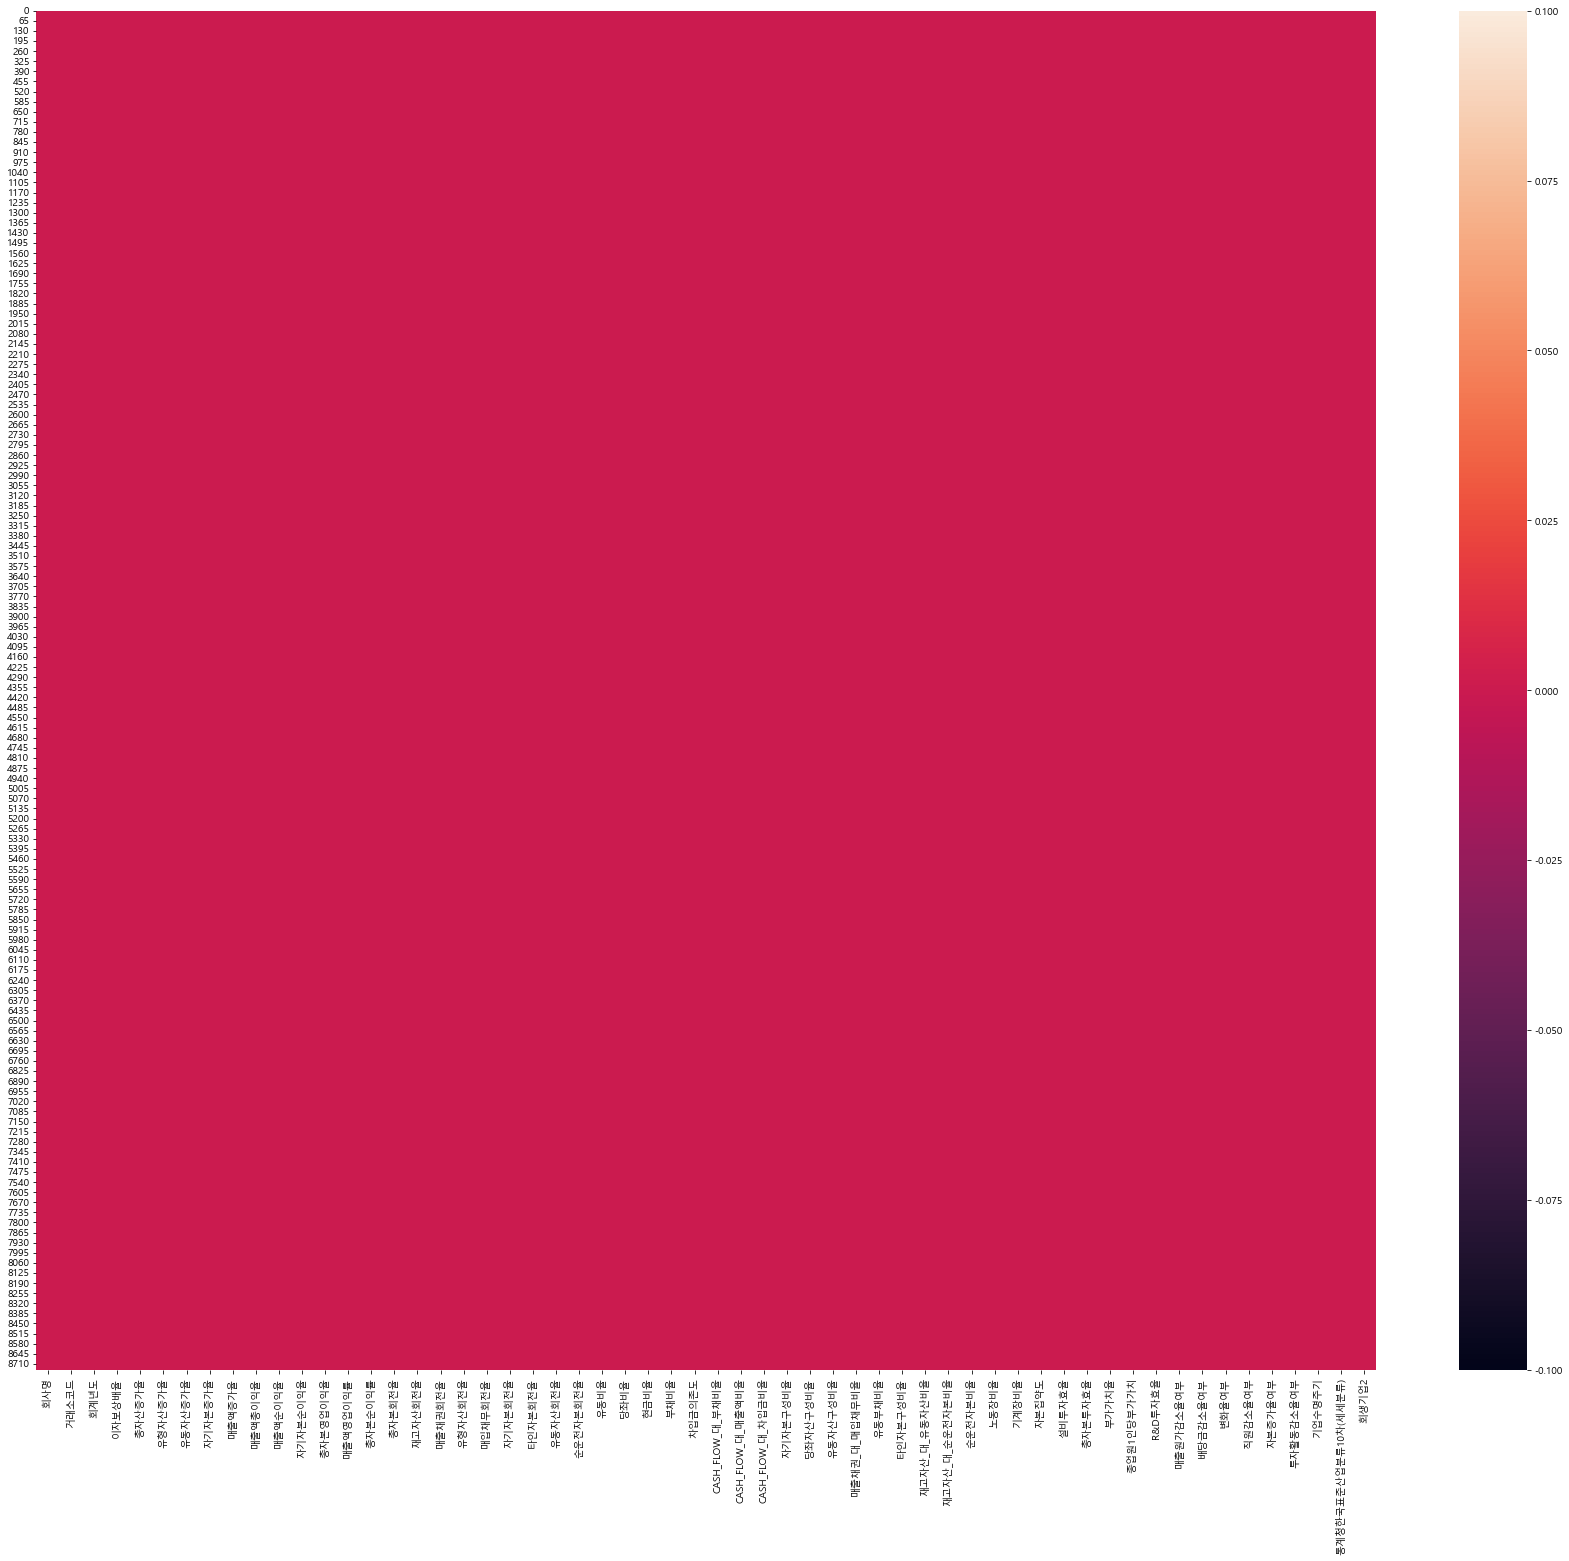

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글 깨짐 방지
plt.rc("axes", unicode_minus=False)
plt.figure(figsize=(30,25))

sns.heatmap(df.isna())

In [140]:
# # 남은 결측치를 평균으로 채워넣고 다시 확인

# medi = lambda x: x.fillna(x.mean())
# df = df.groupby('회사명').apply(medi)
# df = df.dropna()
# df = df.reset_index(drop=True)
# df.isna().sum()

#### 이상치 확인

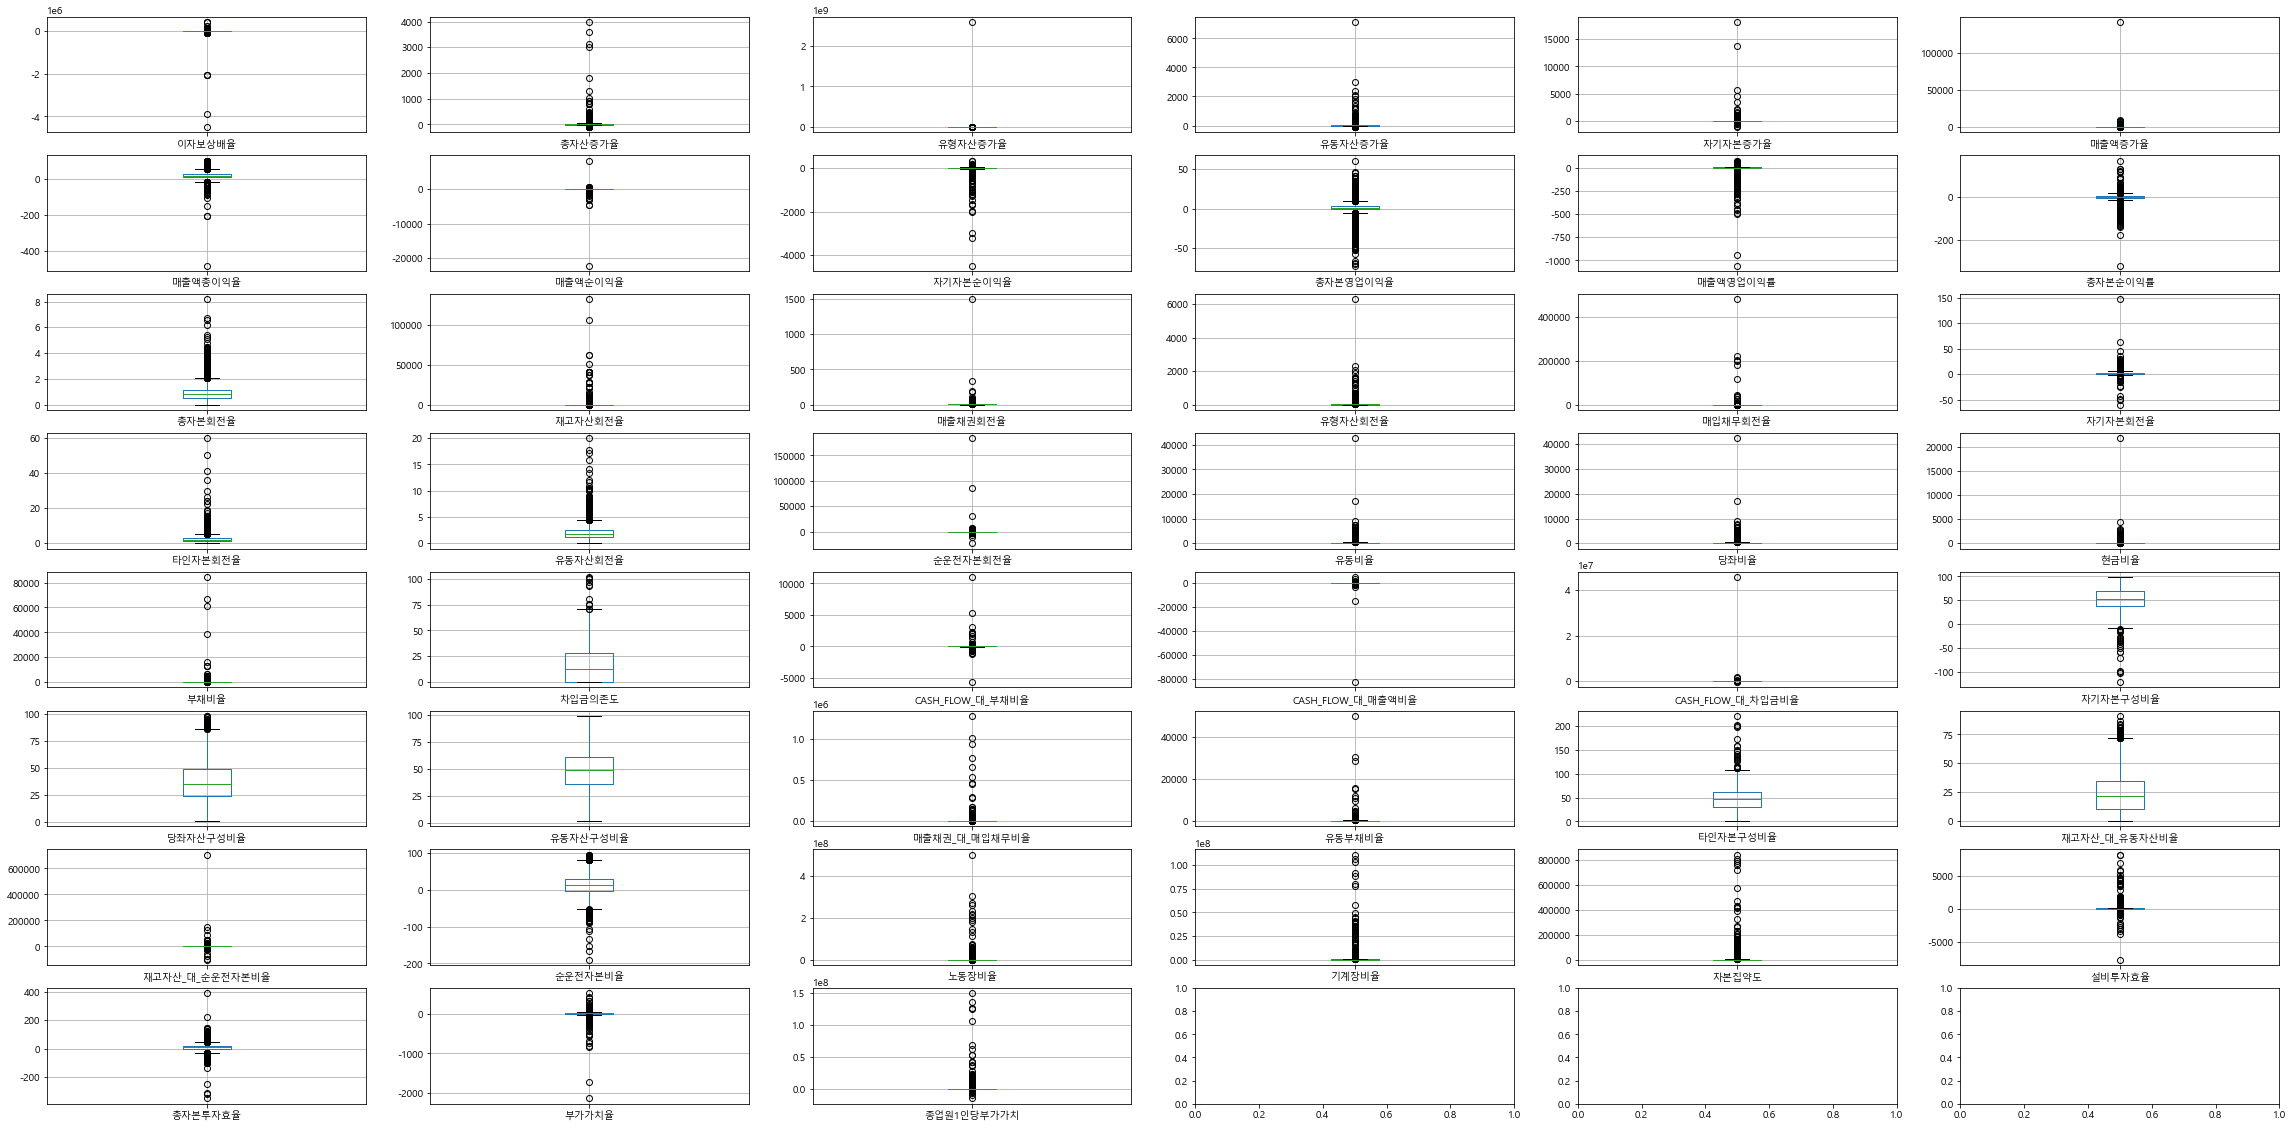

In [141]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

df.boxplot(column='이자보상배율', ax=axes[0,0])
df.boxplot(column='총자산증가율', ax=axes[0,1])
df.boxplot(column='유형자산증가율', ax=axes[0,2])
df.boxplot(column='유동자산증가율', ax=axes[0,3])
df.boxplot(column='자기자본증가율', ax=axes[0,4])
df.boxplot(column='매출액증가율', ax=axes[0,5])
df.boxplot(column='매출액총이익율', ax=axes[1,0])
df.boxplot(column='매출액순이익율', ax=axes[1,1])
df.boxplot(column='자기자본순이익율', ax=axes[1,2])
df.boxplot(column='총자본영업이익율', ax=axes[1,3])
df.boxplot(column='매출액영업이익률', ax=axes[1,4])
df.boxplot(column='총자본순이익률', ax=axes[1,5])
df.boxplot(column='총자본회전율', ax=axes[2,0])
df.boxplot(column='재고자산회전율', ax=axes[2,1])
df.boxplot(column='매출채권회전율', ax=axes[2,2])
df.boxplot(column='유형자산회전율', ax=axes[2,3])
df.boxplot(column='매입채무회전율', ax=axes[2,4])
df.boxplot(column='자기자본회전율', ax=axes[2,5])
df.boxplot(column='타인자본회전율', ax=axes[3,0])
df.boxplot(column='유동자산회전율', ax=axes[3,1])
df.boxplot(column='순운전자본회전율', ax=axes[3,2])
df.boxplot(column='유동비율', ax=axes[3,3])
df.boxplot(column='당좌비율', ax=axes[3,4])
df.boxplot(column='현금비율', ax=axes[3,5])
df.boxplot(column='부채비율', ax=axes[4,0])
df.boxplot(column='차입금의존도', ax=axes[4,1])
df.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
df.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
df.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
df.boxplot(column='자기자본구성비율', ax=axes[4,5])
df.boxplot(column='당좌자산구성비율', ax=axes[5,0])
df.boxplot(column='유동자산구성비율', ax=axes[5,1])
df.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
df.boxplot(column='유동부채비율', ax=axes[5,3])
df.boxplot(column='타인자본구성비율', ax=axes[5,4])
df.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
df.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
df.boxplot(column='순운전자본비율', ax=axes[6,1])
df.boxplot(column='노동장비율', ax=axes[6,2])
df.boxplot(column='기계장비율', ax=axes[6,3])
df.boxplot(column='자본집약도', ax=axes[6,4])
df.boxplot(column='설비투자효율', ax=axes[6,5])
df.boxplot(column='총자본투자효율', ax=axes[7,0])
df.boxplot(column='부가가치율', ax=axes[7,1])
df.boxplot(column='종업원1인당부가가치', ax=axes[7,2])

plt.show()

In [142]:
# # 윈저라이징을 통한 이상치 조정

# from scipy.stats.mstats import winsorize
# df1 = df.iloc[:, 3:49]
# for col in df1.columns:
#      df1[col] = winsorize(df1[col], limits= 0.025)

# # 통계청 ~ 반정형 : df.iloc[:, 49:]

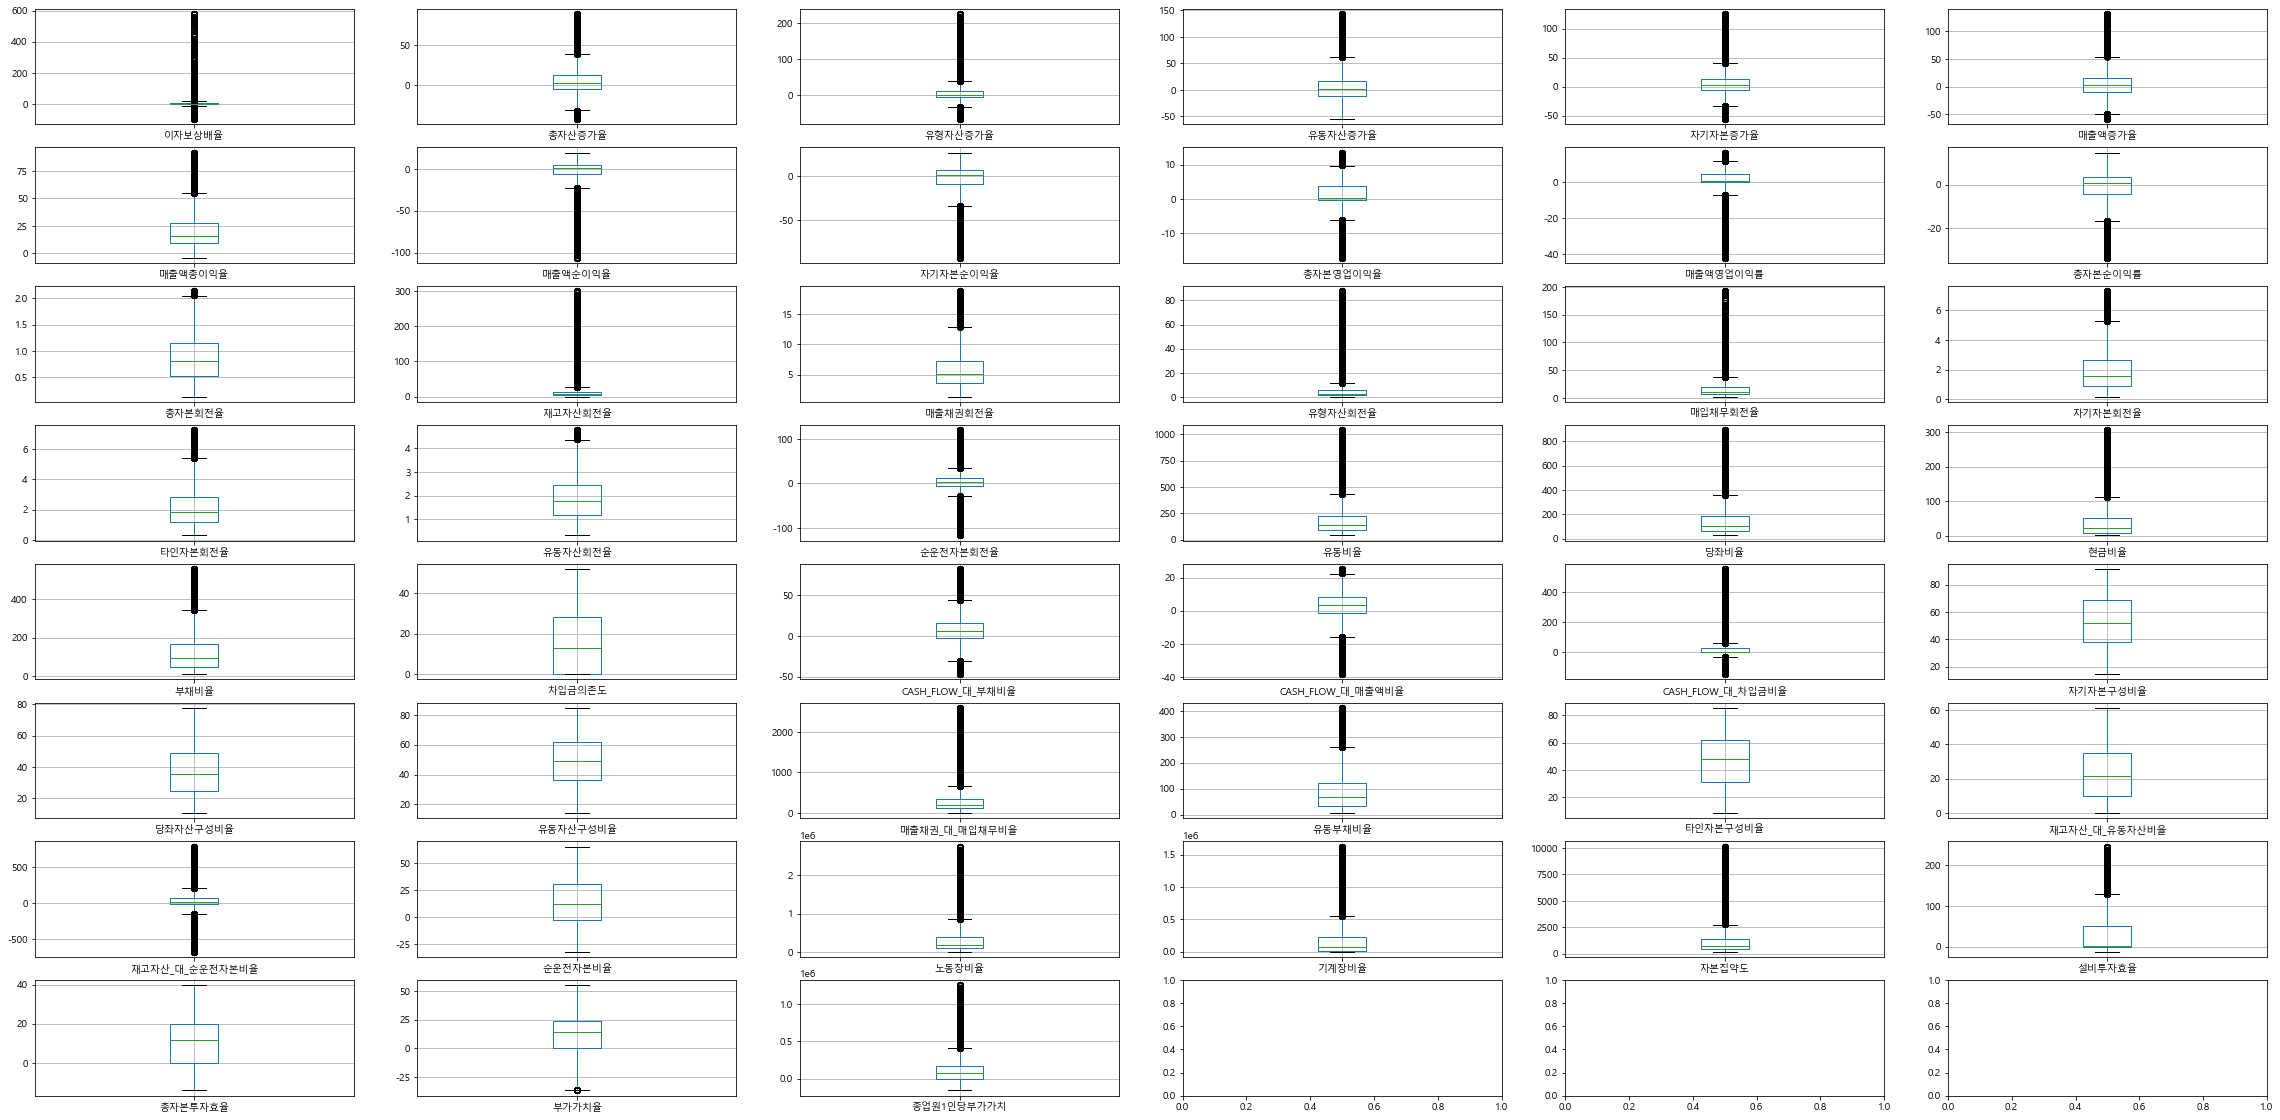

In [143]:
# 재확인
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

df1.boxplot(column='이자보상배율', ax=axes[0,0])
df1.boxplot(column='총자산증가율', ax=axes[0,1])
df1.boxplot(column='유형자산증가율', ax=axes[0,2])
df1.boxplot(column='유동자산증가율', ax=axes[0,3])
df1.boxplot(column='자기자본증가율', ax=axes[0,4])
df1.boxplot(column='매출액증가율', ax=axes[0,5])
df1.boxplot(column='매출액총이익율', ax=axes[1,0])
df1.boxplot(column='매출액순이익율', ax=axes[1,1])
df1.boxplot(column='자기자본순이익율', ax=axes[1,2])
df1.boxplot(column='총자본영업이익율', ax=axes[1,3])
df1.boxplot(column='매출액영업이익률', ax=axes[1,4])
df1.boxplot(column='총자본순이익률', ax=axes[1,5])
df1.boxplot(column='총자본회전율', ax=axes[2,0])
df1.boxplot(column='재고자산회전율', ax=axes[2,1])
df1.boxplot(column='매출채권회전율', ax=axes[2,2])
df1.boxplot(column='유형자산회전율', ax=axes[2,3])
df1.boxplot(column='매입채무회전율', ax=axes[2,4])
df1.boxplot(column='자기자본회전율', ax=axes[2,5])
df1.boxplot(column='타인자본회전율', ax=axes[3,0])
df1.boxplot(column='유동자산회전율', ax=axes[3,1])
df1.boxplot(column='순운전자본회전율', ax=axes[3,2])
df1.boxplot(column='유동비율', ax=axes[3,3])
df1.boxplot(column='당좌비율', ax=axes[3,4])
df1.boxplot(column='현금비율', ax=axes[3,5])
df1.boxplot(column='부채비율', ax=axes[4,0])
df1.boxplot(column='차입금의존도', ax=axes[4,1])
df1.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
df1.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
df1.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
df1.boxplot(column='자기자본구성비율', ax=axes[4,5])
df1.boxplot(column='당좌자산구성비율', ax=axes[5,0])
df1.boxplot(column='유동자산구성비율', ax=axes[5,1])
df1.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
df1.boxplot(column='유동부채비율', ax=axes[5,3])
df1.boxplot(column='타인자본구성비율', ax=axes[5,4])
df1.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
df1.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
df1.boxplot(column='순운전자본비율', ax=axes[6,1])
df1.boxplot(column='노동장비율', ax=axes[6,2])
df1.boxplot(column='기계장비율', ax=axes[6,3])
df1.boxplot(column='자본집약도', ax=axes[6,4])
df1.boxplot(column='설비투자효율', ax=axes[6,5])
df1.boxplot(column='총자본투자효율', ax=axes[7,0])
df1.boxplot(column='부가가치율', ax=axes[7,1])
df1.boxplot(column='종업원1인당부가가치', ax=axes[7,2])

plt.show()

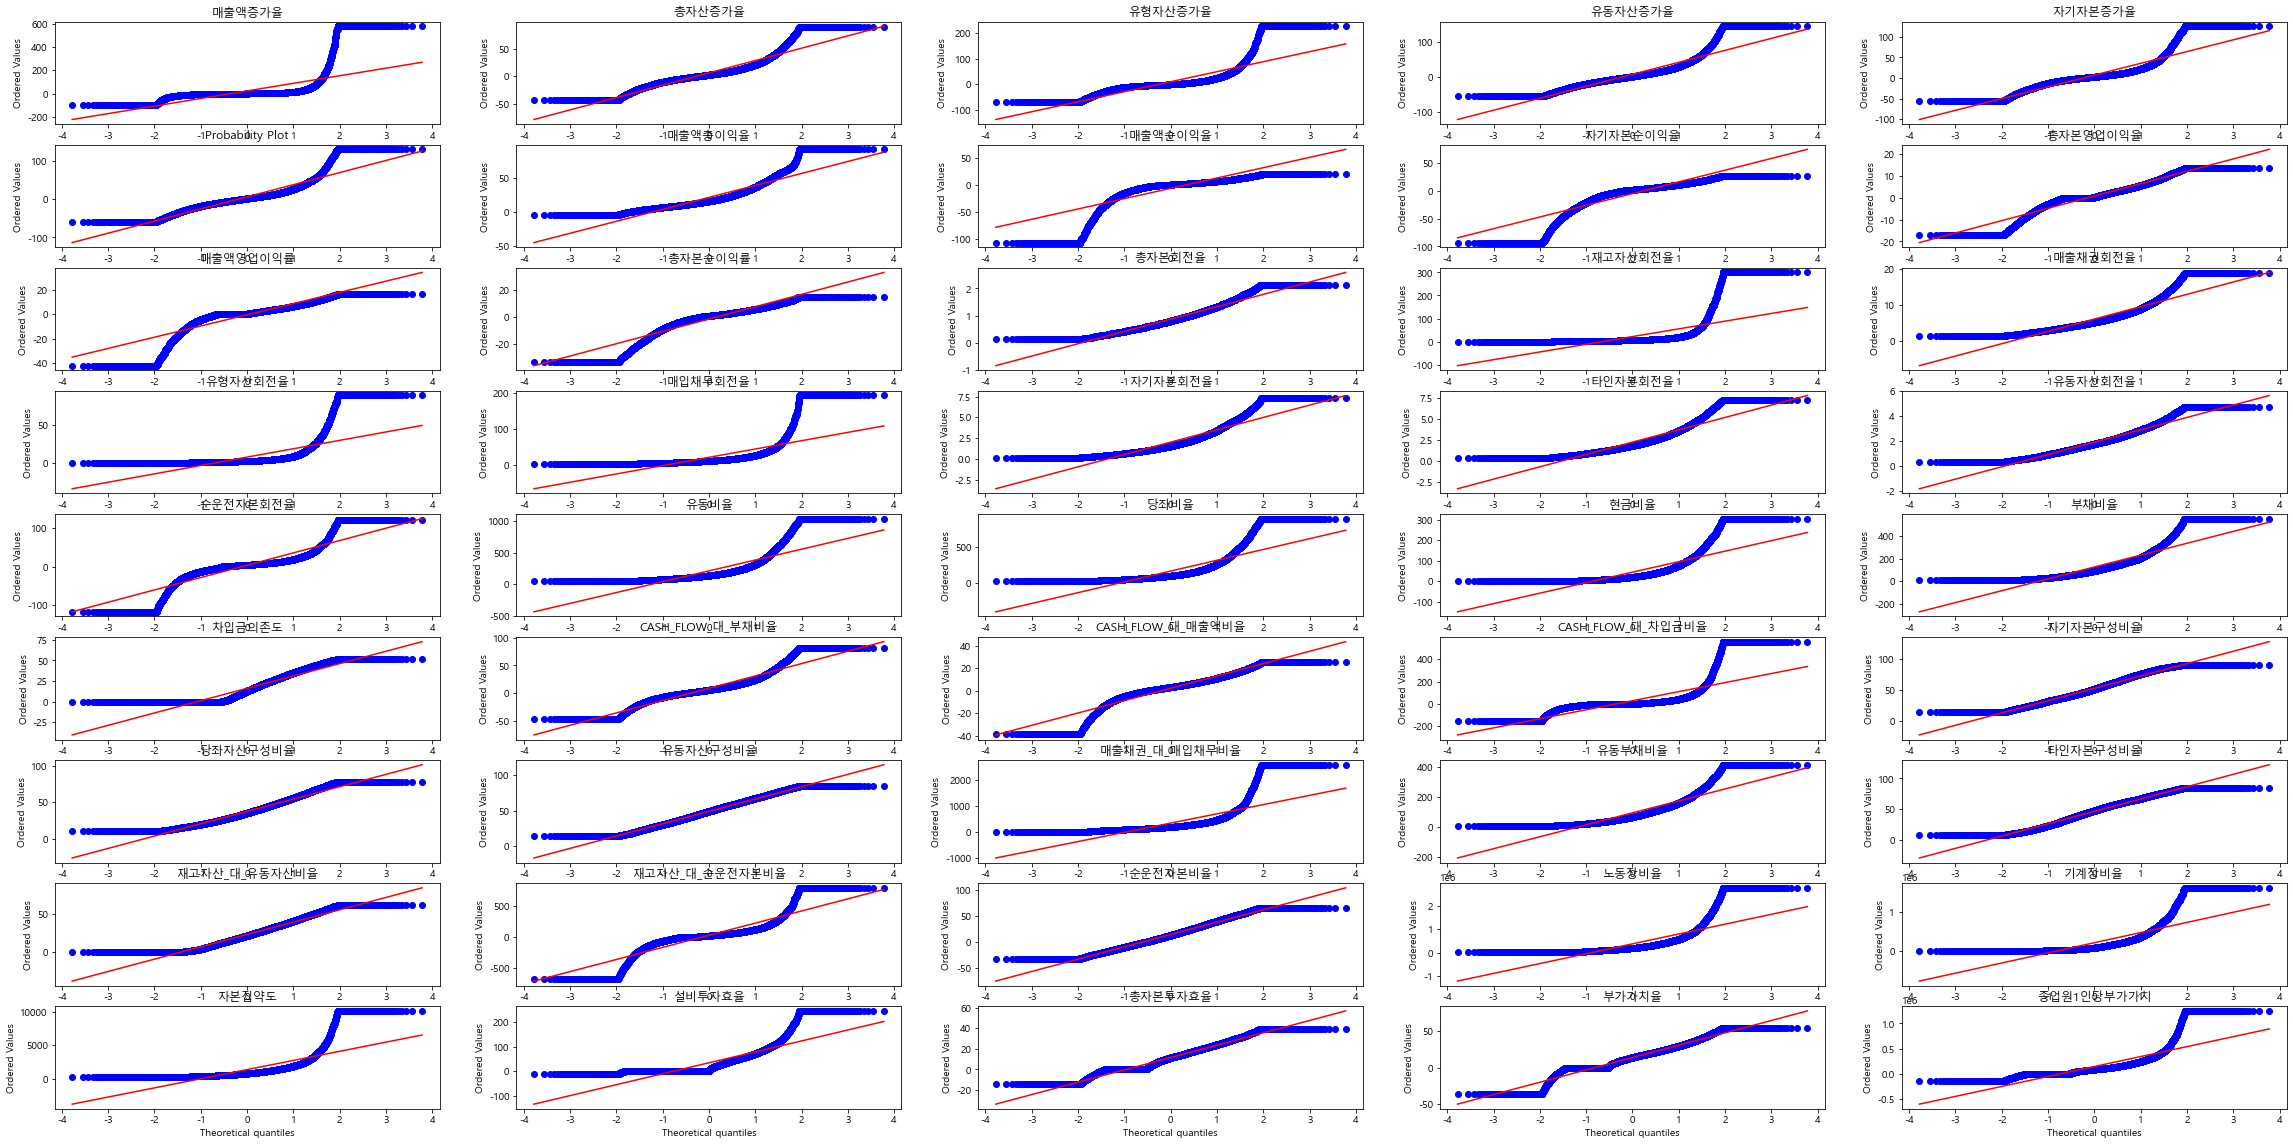

In [144]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread
import scipy.stats as stats

fig, axes = plt.subplots(9,5)
fig.set_size_inches((40,20))

stats.probplot(df1['이자보상배율'],dist=stats.norm,plot=axes[0,0])
axes[0,0].title.set_text("이자보상배율")
stats.probplot(df1['총자산증가율'],dist=stats.norm,plot=axes[0,1])
axes[0,1].title.set_text("총자산증가율")
stats.probplot(df1['유형자산증가율'],dist=stats.norm,plot=axes[0,2])
axes[0,2].title.set_text("유형자산증가율")
stats.probplot(df1['유동자산증가율'],dist=stats.norm,plot=axes[0,3])
axes[0,3].title.set_text("유동자산증가율")
stats.probplot(df1['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
axes[0,4].title.set_text("자기자본증가율")
stats.probplot(df1['매출액증가율'],dist=stats.norm,plot=axes[1,0])
axes[0,0].title.set_text("매출액증가율")
stats.probplot(df1['매출액총이익율'],dist=stats.norm,plot=axes[1,1])
axes[1,1].title.set_text("매출액총이익율")
stats.probplot(df1['매출액순이익율'],dist=stats.norm,plot=axes[1,2])
axes[1,2].title.set_text("매출액순이익율")
stats.probplot(df1['자기자본순이익율'],dist=stats.norm,plot=axes[1,3])
axes[1,3].title.set_text("자기자본순이익율")
stats.probplot(df1['총자본영업이익율'],dist=stats.norm,plot=axes[1,4])
axes[1,4].title.set_text("총자본영업이익율")
stats.probplot(df1['매출액영업이익률'],dist=stats.norm,plot=axes[2,0])
axes[2,0].title.set_text("매출액영업이익률")
stats.probplot(df1['총자본순이익률'],dist=stats.norm,plot=axes[2,1])
axes[2,1].title.set_text("총자본순이익률")
stats.probplot(df1['총자본회전율'],dist=stats.norm,plot=axes[2,2])
axes[2,2].title.set_text("총자본회전율")
stats.probplot(df1['재고자산회전율'],dist=stats.norm,plot=axes[2,3])
axes[2,3].title.set_text("재고자산회전율")
stats.probplot(df1['매출채권회전율'],dist=stats.norm,plot=axes[2,4])
axes[2,4].title.set_text("매출채권회전율")
stats.probplot(df1['유형자산회전율'],dist=stats.norm,plot=axes[3,0])
axes[3,0].title.set_text("유형자산회전율")
stats.probplot(df1['매입채무회전율'],dist=stats.norm,plot=axes[3,1])
axes[3,1].title.set_text("매입채무회전율")
stats.probplot(df1['자기자본회전율'],dist=stats.norm,plot=axes[3,2])
axes[3,2].title.set_text("자기자본회전율")
stats.probplot(df1['타인자본회전율'],dist=stats.norm,plot=axes[3,3])
axes[3,3].title.set_text("타인자본회전율")
stats.probplot(df1['유동자산회전율'],dist=stats.norm,plot=axes[3,4])
axes[3,4].title.set_text("유동자산회전율")
stats.probplot(df1['순운전자본회전율'],dist=stats.norm,plot=axes[4,0])
axes[4,0].title.set_text("순운전자본회전율")
stats.probplot(df1['유동비율'],dist=stats.norm,plot=axes[4,1])
axes[4,1].title.set_text("유동비율")
stats.probplot(df1['당좌비율'],dist=stats.norm,plot=axes[4,2])
axes[4,2].title.set_text("당좌비율")
stats.probplot(df1['현금비율'],dist=stats.norm,plot=axes[4,3])
axes[4,3].title.set_text("현금비율")
stats.probplot(df1['부채비율'],dist=stats.norm,plot=axes[4,4])
axes[4,4].title.set_text("부채비율")
stats.probplot(df1['차입금의존도'],dist=stats.norm,plot=axes[5,0])
axes[5,0].title.set_text("차입금의존도")
stats.probplot(df1['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[5,1])
axes[5,1].title.set_text("CASH_FLOW_대_부채비율")
stats.probplot(df1['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,2])
axes[5,2].title.set_text("CASH_FLOW_대_매출액비율")
stats.probplot(df1['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,3])
axes[5,3].title.set_text("CASH_FLOW_대_차입금비율")
stats.probplot(df1['자기자본구성비율'],dist=stats.norm,plot=axes[5,4])
axes[5,4].title.set_text("자기자본구성비율")
stats.probplot(df1['당좌자산구성비율'],dist=stats.norm,plot=axes[6,0])
axes[6,0].title.set_text("당좌자산구성비율")
stats.probplot(df1['유동자산구성비율'],dist=stats.norm,plot=axes[6,1])
axes[6,1].title.set_text("유동자산구성비율")
stats.probplot(df1['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,2])
axes[6,2].title.set_text("매출채권_대_매입채무비율")
stats.probplot(df1['유동부채비율'],dist=stats.norm,plot=axes[6,3])
axes[6,3].title.set_text("유동부채비율")
stats.probplot(df1['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
axes[6,4].title.set_text("타인자본구성비율")
stats.probplot(df1['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,0])
axes[7,0].title.set_text("재고자산_대_유동자산비율")
stats.probplot(df1['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,1])
axes[7,1].title.set_text("재고자산_대_순운전자본비율")
stats.probplot(df1['순운전자본비율'],dist=stats.norm,plot=axes[7,2])
axes[7,2].title.set_text("순운전자본비율")
stats.probplot(df1['노동장비율'],dist=stats.norm,plot=axes[7,3])
axes[7,3].title.set_text("노동장비율")
stats.probplot(df1['기계장비율'],dist=stats.norm,plot=axes[7,4])
axes[7,4].title.set_text("기계장비율")
stats.probplot(df1['자본집약도'],dist=stats.norm,plot=axes[8,0])
axes[8,0].title.set_text("자본집약도")
stats.probplot(df1['설비투자효율'],dist=stats.norm,plot=axes[8,1])
axes[8,1].title.set_text("설비투자효율")
stats.probplot(df1['총자본투자효율'],dist=stats.norm,plot=axes[8,2])
axes[8,2].title.set_text("총자본투자효율")
stats.probplot(df1['부가가치율'],dist=stats.norm,plot=axes[8,3])
axes[8,3].title.set_text("부가가치율")
stats.probplot(df1['종업원1인당부가가치'],dist=stats.norm,plot=axes[8,4])
axes[8,4].title.set_text("종업원1인당부가가치")

plt.show()

In [145]:
# feature 후보 입장

temp = df1[['총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인당부가가치']]

x = pd.concat([df['회계년도'], temp], axis=1)
x = pd.concat([x, df.iloc[:, 49:]], axis=1)
x

,회계년도,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,매출액영업이익률,총자본순이익률,총자본회전율,재고자산회전율,매출채권회전율,유형자산회전율,매입채무회전율,자기자본회전율,타인자본회전율,유동자산회전율,순운전자본회전율,유동비율,당좌비율,현금비율,부채비율,차입금의존도,CASH_FLOW_대_부채비율,CASH_FLOW_대_매출액비율,CASH_FLOW_대_차입금비율,자기자본구성비율,당좌자산구성비율,유동자산구성비율,매출채권_대_매입채무비율,유동부채비율,타인자본구성비율,재고자산_대_유동자산비율,재고자산_대_순운전자본비율,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원1인당부가가치,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,기업수명주기,통계청한국표준산업분류10차(세세분류),회생기업2
0,2011,1.98,-5.90,17.64,-2.02,56.40,41.83,-8.50,-8.28,2.37,3.61,-5.58,0.66,3.74,2.29,1.77,11.95,0.97,2.01,1.25,4.61,200.97,165.03,15.10,51.41,7.32,-46.08,-24.07,-149.51,66.05,46.14,56.18,602.31,42.33,33.95,17.88,35.59,28.23,71726.36,29216.43,202.26,35.858193,12.72,19.56,25719.78,1,0,0,0,0,0,1,의약품제조업,0
1,2012,89.39,-4.12,143.71,75.17,-8.43,28.34,-40.97,-26.84,-9.96,-25.87,-15.78,0.39,4.09,1.75,1.71,7.83,0.66,0.93,0.52,0.81,693.49,649.98,68.81,80.77,0.18,-8.10,-12.71,-149.51,55.32,77.32,82.49,323.41,21.50,44.68,6.27,7.33,65.28,69458.82,32002.75,426.18,0.000000,0.47,1.66,2009.78,0,0,0,0,1,1,1,의약품제조업,0
2,2013,-2.09,16.09,-18.89,55.10,25.51,38.70,1.45,0.74,1.40,3.88,0.52,0.36,3.30,2.02,2.03,6.20,0.51,1.26,0.48,1.25,694.71,610.74,305.29,14.11,0.00,-39.85,-13.51,0.00,87.63,60.08,68.34,282.72,11.23,12.37,12.09,14.12,58.50,66012.04,33789.62,411.12,77.914703,12.51,34.29,51433.09,0,0,0,0,0,0,5,의약품제조업,0
3,2014,3.86,74.30,-25.93,0.01,11.52,37.07,0.69,0.32,0.78,1.94,0.28,0.40,3.00,1.85,1.54,5.27,0.46,2.85,0.68,2.32,324.58,268.23,101.24,18.50,0.01,-17.73,-7.06,-149.51,84.39,40.28,48.74,285.31,17.79,15.61,17.36,25.09,33.72,113899.65,48479.94,354.08,37.802533,12.16,31.04,43056.95,0,0,0,1,0,0,2,의약품제조업,0
4,2015,-2.64,-5.37,-7.17,-4.48,18.85,36.26,-13.50,-7.62,-4.49,-9.51,-6.37,0.47,3.32,2.09,1.48,5.66,0.56,2.88,0.99,3.10,296.85,235.21,29.00,20.78,0.01,16.12,5.80,557.49,82.80,36.82,46.47,254.69,18.91,17.20,20.77,31.32,30.82,114246.59,53386.77,362.39,0.000000,7.63,15.96,27662.63,0,0,0,0,1,0,2,의약품제조업,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8743,2015,21.93,49.36,-11.18,3.39,2.42,6.20,1.24,6.18,2.95,2.51,1.46,1.17,64.23,17.20,2.09,16.05,4.96,1.54,4.75,-13.39,51.92,47.54,7.76,357.39,24.52,2.78,2.03,8.85,21.86,15.76,17.21,60.44,151.66,78.14,8.43,-9.10,-15.94,593960.16,14.23,973.73,21.494004,13.11,12.28,127665.82,0,0,0,0,0,0,3,외항화물운송업,1
8744,2016,21.08,38.84,-25.08,11.22,-1.58,4.49,-2.06,-9.40,0.67,0.71,-1.96,0.95,53.94,17.35,1.44,16.26,4.55,1.20,4.75,-10.62,42.12,32.52,5.46,397.97,19.03,2.12,1.96,8.92,20.08,10.51,14.31,68.73,134.41,79.92,17.60,-11.47,-16.34,706868.14,12.28,1017.55,15.812610,10.98,12.66,111774.30,0,1,0,0,0,1,1,외항화물운송업,0
8745,2017,-11.43,-16.50,13.29,-39.28,0.56,2.09,-8.79,-47.52,-1.45,-1.57,-8.13,0.93,43.17,15.61,1.36,15.39,5.41,1.12,4.75,-8.05,42.12,29.58,6.17,557.10,22.90,-0.57,-0.50,-2.13,14.61,11.27,14.31,65.00,276.77,85.39,17.27,-9.61,-24.48,599097.86,12.56,921.78,8.349918,5.43,5.51,50024.18,0,0,0,0,0,0,1,외항화물운송업,0
8746,2018,-5.33,-12.07,-6.33,-37.42,-9.87,-0.93,-11.48,-91.08,-4.55,-4.99,-10.47,0.91,39.24,12.79,1.43,11.87,7.27,1.03,4.75,-7.39,42.12,28.66,4.89,557.10,22.24,-2.78,-2.70,-11.38,14.61,11.14,14.31,59.32,411.98,85.39,17.36,-9.21,-25.40,618981.48,14.54,1009.67,0.000000,4.24,4.52,42782.54,0,1,0,0,0,0,5,외항화물운송업,0


In [146]:
x.sort_values(by='회계년도', inplace=True)
x.reset_index(drop=True, inplace=True)
x

,회계년도,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,매출액영업이익률,총자본순이익률,총자본회전율,재고자산회전율,매출채권회전율,유형자산회전율,매입채무회전율,자기자본회전율,타인자본회전율,유동자산회전율,순운전자본회전율,유동비율,당좌비율,현금비율,부채비율,차입금의존도,CASH_FLOW_대_부채비율,CASH_FLOW_대_매출액비율,CASH_FLOW_대_차입금비율,자기자본구성비율,당좌자산구성비율,유동자산구성비율,매출채권_대_매입채무비율,유동부채비율,타인자본구성비율,재고자산_대_유동자산비율,재고자산_대_순운전자본비율,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원1인당부가가치,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,기업수명주기,통계청한국표준산업분류10차(세세분류),회생기업2
0,2011,1.98,-5.90,17.64,-2.02,56.40,41.83,-8.50,-8.28,2.37,3.61,-5.58,0.66,3.74,2.29,1.77,11.95,0.97,2.01,1.25,4.61,200.97,165.03,15.10,51.41,7.32,-46.08,-24.07,-149.51,66.05,46.14,56.18,602.31,42.33,33.95,17.88,35.59,28.23,71726.36,29216.43,202.26,35.858193,12.72,19.56,25719.78,1,0,0,0,0,0,1,의약품제조업,0
1,2011,13.04,1.71,35.94,29.14,47.52,14.36,6.72,26.49,0.00,0.00,14.81,2.13,48.45,8.99,6.86,11.50,6.79,4.14,4.62,75.50,111.87,104.36,31.87,148.63,0.00,14.08,3.47,0.00,40.22,56.41,60.47,96.59,134.39,59.78,6.71,63.26,6.42,46885.79,55375.63,185.36,0.000000,0.00,0.00,0.00,0,0,0,0,0,0,4,그외자동차용신품부품제조업,0
2,2011,3.11,0.01,4.78,21.79,-6.84,21.81,6.67,11.09,7.53,11.79,4.26,0.64,2.42,3.48,1.72,12.12,1.66,1.04,1.34,-28.92,91.68,51.97,5.03,140.59,44.12,11.18,10.39,14.81,41.57,27.18,47.94,384.56,125.81,58.43,43.32,-477.39,-4.35,352937.97,332835.13,971.48,45.597681,16.57,26.34,160931.53,0,0,0,0,0,1,3,사진장비및광학기기제조업,0
3,2011,11.97,19.54,3.13,20.61,37.83,14.77,4.70,15.46,11.58,7.41,7.35,1.56,9.49,9.93,2.84,13.73,3.29,2.98,3.75,120.15,100.91,64.50,17.08,103.20,32.75,19.03,6.53,29.52,49.21,25.57,40.01,128.61,80.57,50.79,36.08,791.21,0.36,211780.30,202225.95,390.06,63.691405,34.58,23.37,134885.85,0,0,0,0,0,0,2,축전지제조업,0
4,2011,1.83,-0.28,4.69,3.74,38.02,22.83,1.20,3.60,2.82,1.82,1.85,1.55,10.49,5.26,22.67,8.42,3.00,3.19,2.02,9.80,167.53,158.13,50.01,92.39,20.29,10.62,3.32,25.13,51.98,73.27,77.63,173.94,89.15,48.02,5.61,13.93,31.29,56112.04,0.00,848.82,245.585918,31.80,20.74,269951.71,0,0,0,0,0,0,2,컴퓨터시스템통합자문및구축서비스업,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8743,2019,-11.14,-7.71,-20.47,11.28,3.22,4.21,3.10,16.62,11.10,2.78,12.38,2.13,14.38,11.60,87.48,34.93,5.37,7.24,4.75,19.31,365.27,260.19,6.36,19.90,7.35,39.20,1.53,88.51,83.40,43.15,60.58,661.53,19.88,16.60,28.77,39.61,43.99,131847.10,0.00,3139.77,0.000000,18.71,4.40,587501.65,0,0,0,0,0,0,3,수송용운송장비도매업,1
8744,2019,15.14,29.09,23.35,13.58,6.79,26.67,6.14,5.59,2.34,4.55,3.16,0.51,4.63,2.55,1.97,52.92,0.91,1.18,1.49,-116.97,99.21,72.24,2.74,78.17,29.22,7.01,6.41,10.53,56.13,25.89,35.56,1186.88,63.86,43.87,27.18,-680.81,-0.28,241140.82,99921.36,1119.44,49.758793,10.72,22.33,119988.76,0,0,0,0,0,1,2,수송용운송장비도매업,0
8745,2019,9.86,-0.54,17.31,9.02,4.65,16.69,6.80,11.20,7.74,7.13,7.38,1.08,10.79,10.12,3.22,14.64,1.65,3.18,2.61,14.06,152.28,122.10,60.77,52.28,16.38,26.42,8.75,55.36,65.67,34.43,42.94,155.76,42.94,34.33,19.82,57.72,14.74,467941.03,130200.61,1470.46,86.343051,27.48,26.52,404034.57,0,0,0,0,0,0,2,기기용자동측정및제어장치제조업,0
8746,2019,30.29,2.62,45.27,13.83,-10.54,19.61,2.56,3.44,1.14,1.54,1.90,0.74,251.33,3.00,2.65,12.79,1.35,1.65,1.35,5.05,182.42,181.76,23.25,92.82,0.51,-0.49,-0.36,-46.32,51.86,57.25,57.46,469.27,60.74,48.14,0.37,0.81,25.96,289730.42,0.00,1158.55,104.694291,26.18,39.95,303331.21,0,1,0,0,0,0,5,지상파방송업,1


In [147]:
x['회계년도'].value_counts()

2017    1046
2018    1046
2019    1045
2016    1020
2015     994
2014     945
2013     910
2012     880
2011     862
Name: 회계년도, dtype: int64

#### 연간 데이터 분포
2011 - x[:862]  
2012 - x[862:1742]  
2013 - x[1742:2652]  
2014 - x[2652:3597]  
2015 - x[3597:4591]  
2016 - x[4591:5611]  
2017 - x[5611:6657]  
2018 - x[6657:7703]  
2019 - x[7703:]

<AxesSubplot:>

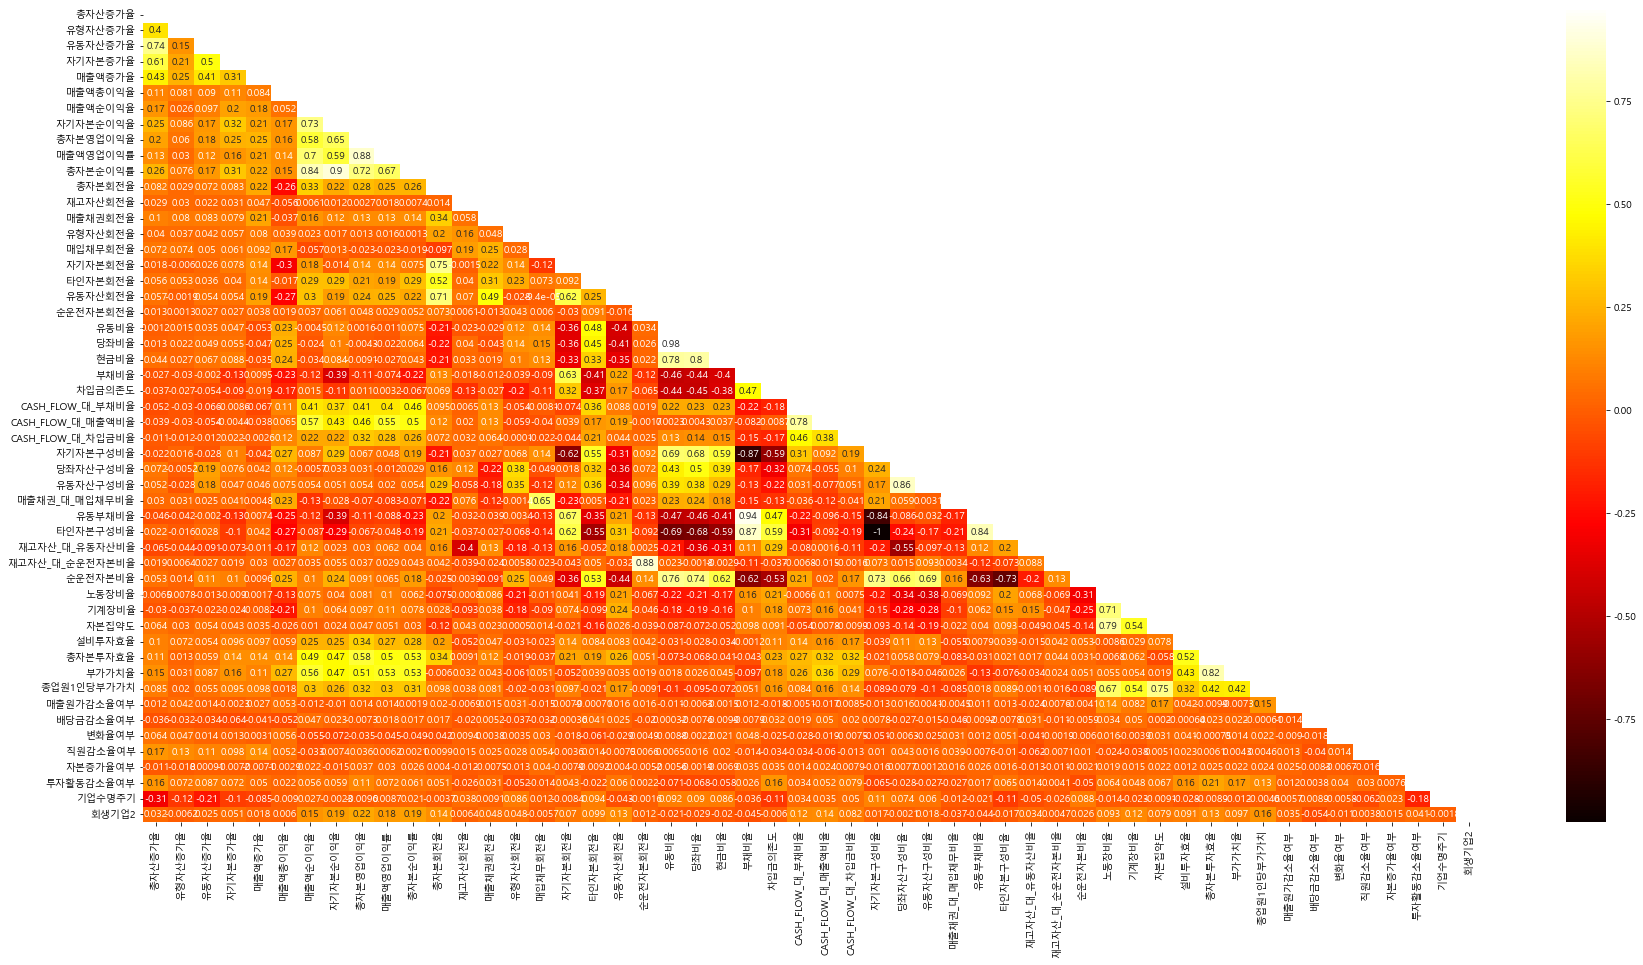

In [148]:
df_corr = x.corr(method='pearson')
mask=np.zeros_like(x.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic") # 한글 깨짐 방지
plt.rc("axes", unicode_minus=False) # 마이너스 부호 깨짐 방지
plt.figure(figsize=(30,15))

sns.heatmap(x.corr(), annot=True, cmap='hot', mask=mask)

In [149]:
# 타겟 정하기
#target_one = x['회생기업1']
target_two = x['회생기업2']

# 비율 데이터
df_rate = x.iloc[:,:44]

# 반정형 데이터
df_encoding = x.iloc[:, 45:52]

# # 둘 다 필요할 땐
# df_all = pd.concat([df_rate, df_encoding], axis=1)

In [150]:
df_encoding

,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,기업수명주기
0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,4
2,0,0,0,0,0,1,3
3,0,0,0,0,0,0,2
4,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...
8743,0,0,0,0,0,0,3
8744,0,0,0,0,0,1,2
8745,0,0,0,0,0,0,2
8746,0,1,0,0,0,0,5


In [151]:
df_rate.drop(columns=['자기자본구성비율'], inplace=True)

<AxesSubplot:>

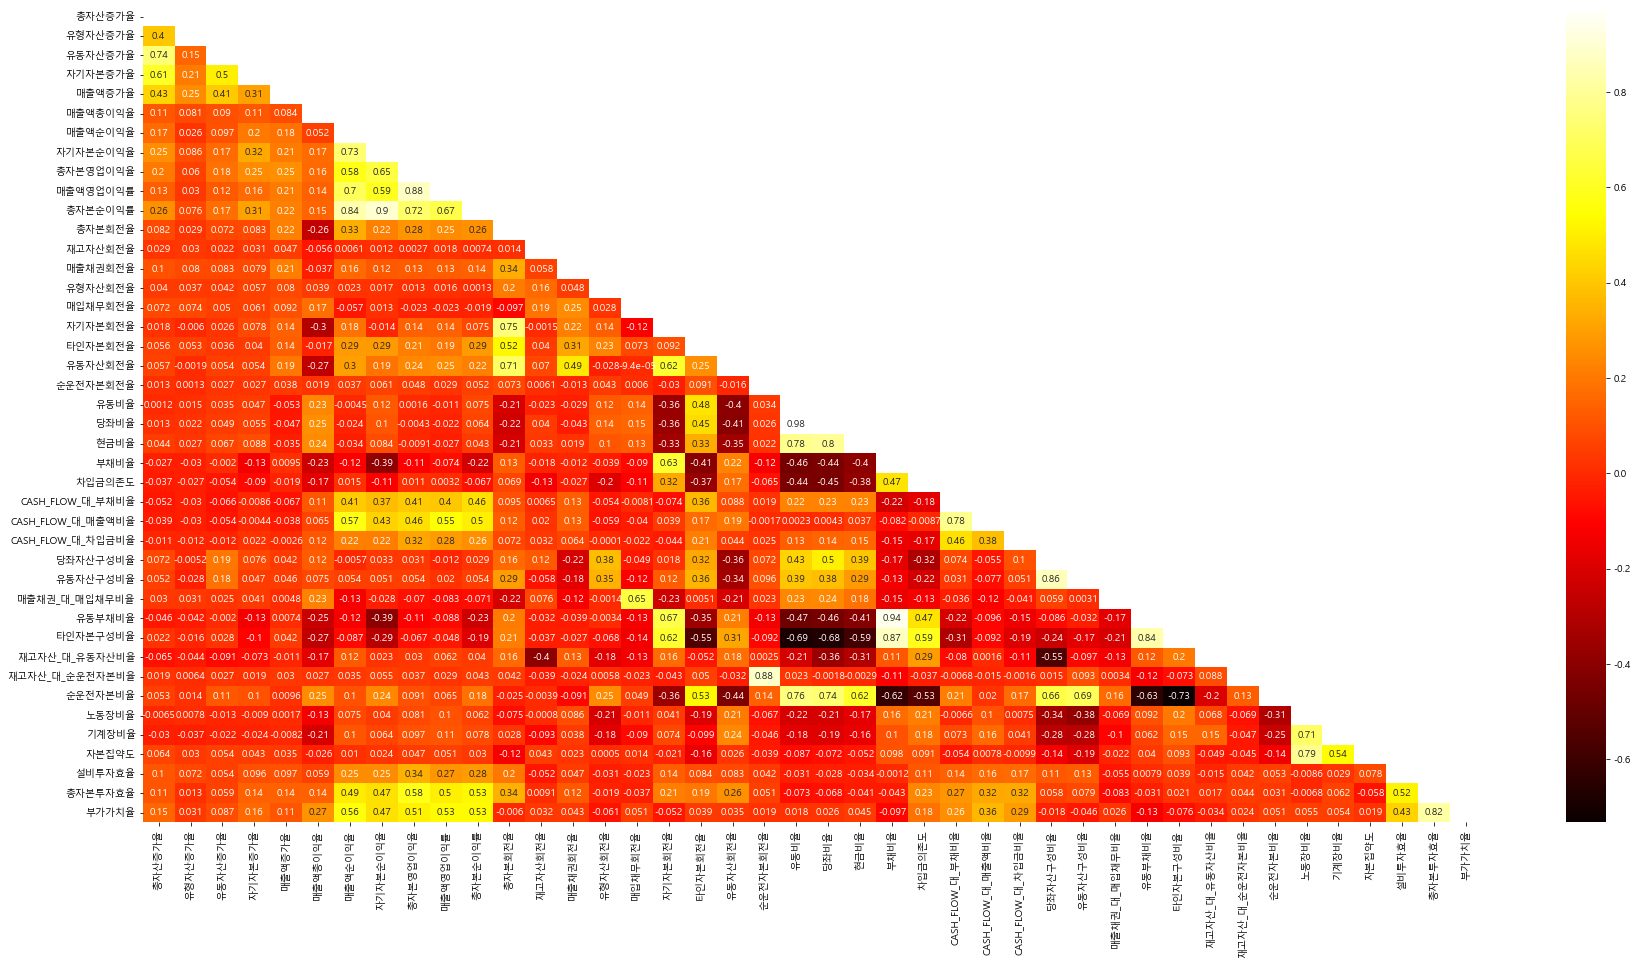

In [152]:
df_corr = df_rate.corr(method='pearson')
mask=np.zeros_like(df_rate.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic") # 한글 깨짐 방지
plt.rc("axes", unicode_minus=False) # 마이너스 부호 깨짐 방지
plt.figure(figsize=(30,15))

sns.heatmap(df_rate.corr(), annot=True, cmap='hot', mask=mask)

In [153]:
df_rate.drop(columns=['회계년도'], inplace=True)

### 정규화

In [154]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

SS = StandardScaler()
RS = RobustScaler()
MIN = MinMaxScaler()

# ############ WARNING ###############
# TEST SET 까지 스케일링 먹이지 마시오 #
# ##################### ##############

# Standard Scaler
ss_sc = SS.fit_transform(df_rate[:5611])
ss_sc2 = pd.DataFrame(ss_sc)

# Robust Scaler
rs_sc = RS.fit_transform(df_rate[:5611])
rs_sc2 = pd.DataFrame(rs_sc)

# Min-Max Scaler
mi_sc = MIN.fit_transform(df_rate[:5611])
mi_sc2 = pd.DataFrame(mi_sc)

In [155]:
ss_sc2.columns = df_rate.columns
rs_sc2.columns = df_rate.columns
mi_sc2.columns = df_rate.columns

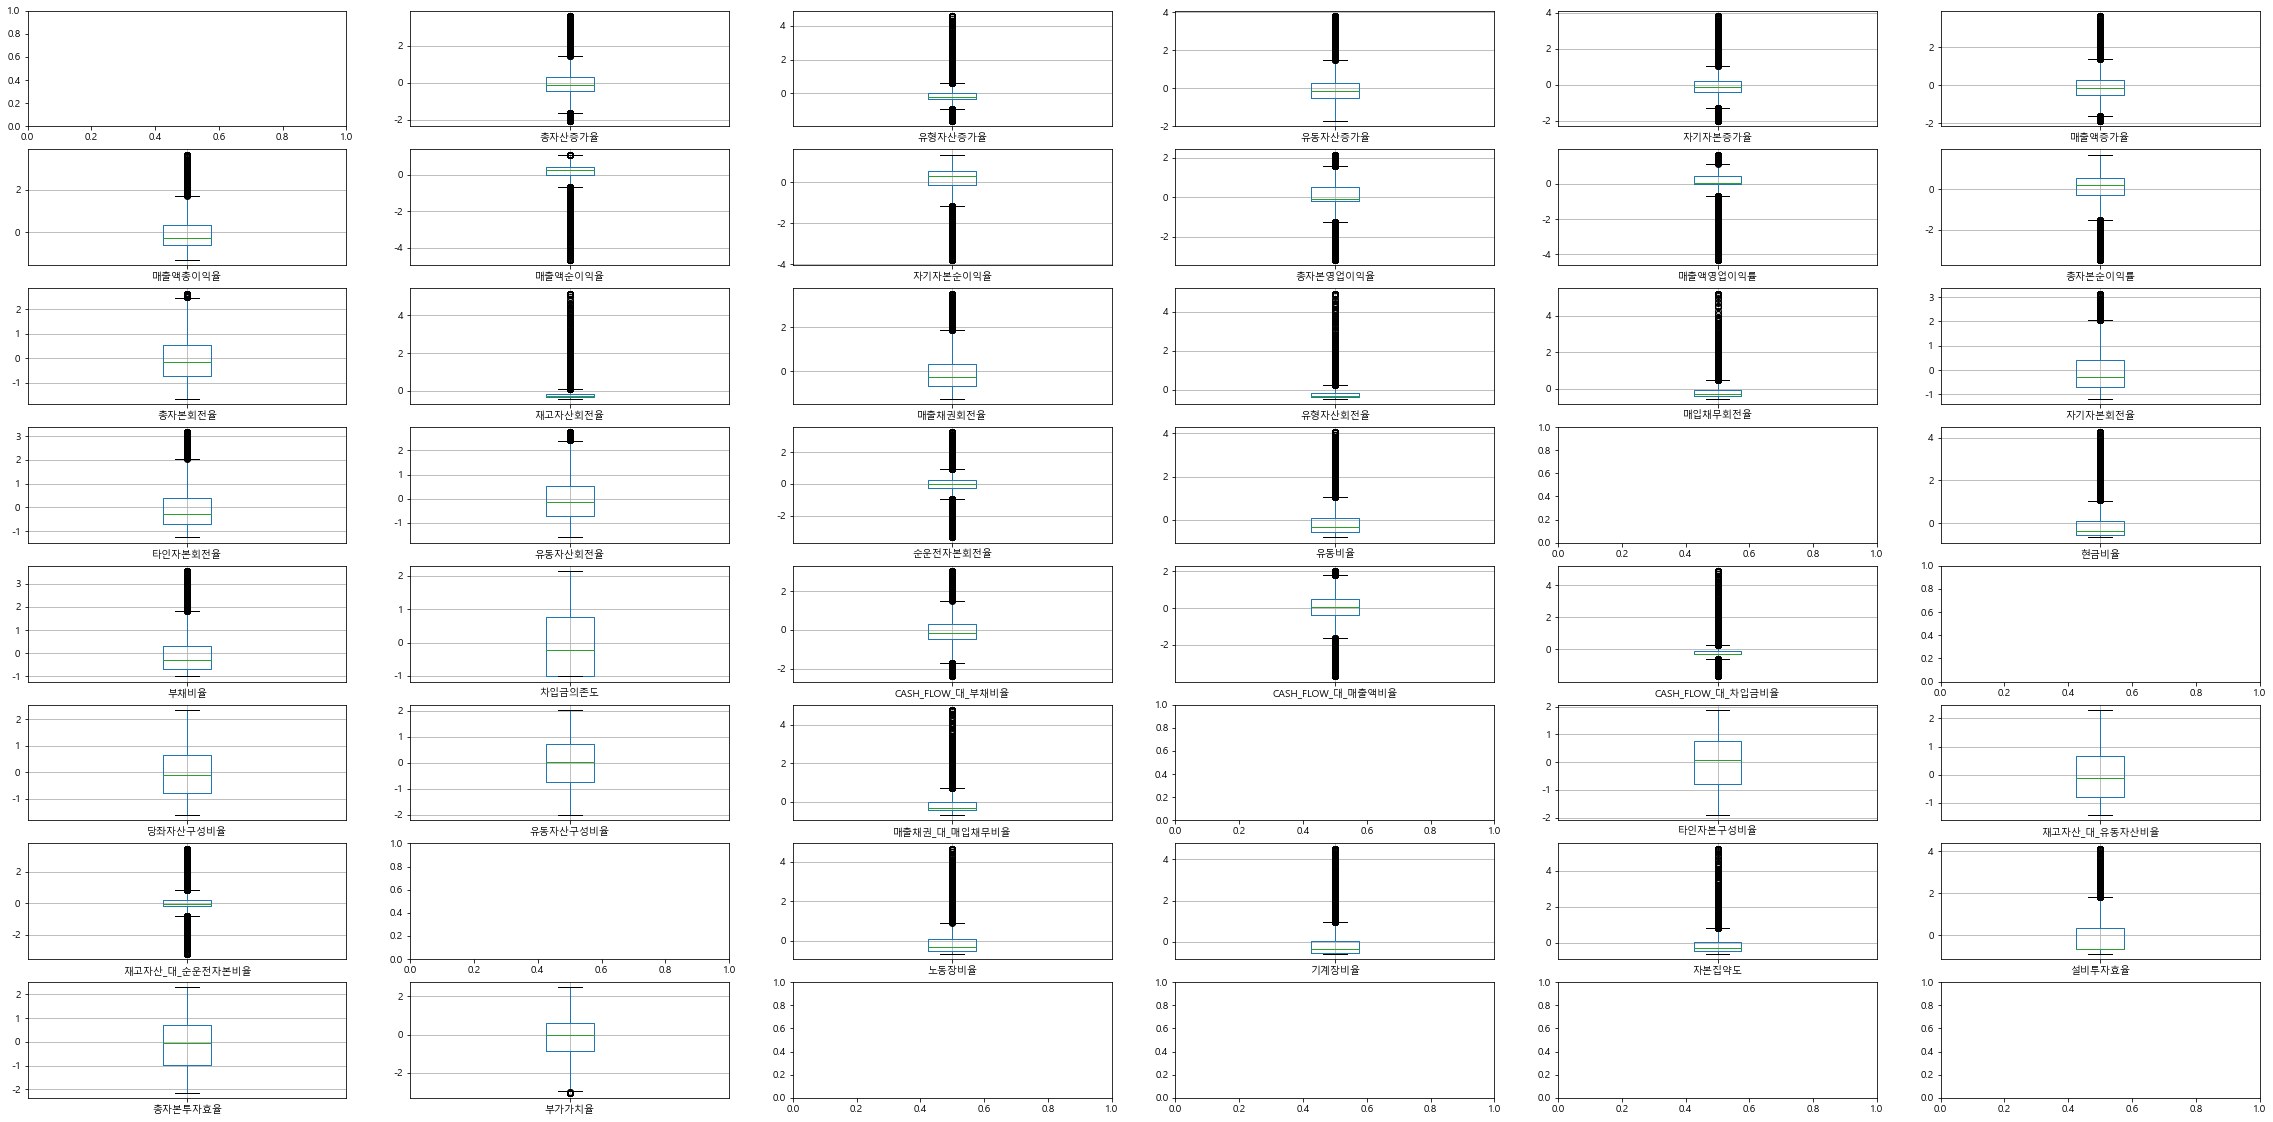

In [156]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

#ss_sc2.boxplot(column='이자보상배율', ax=axes[0,0])
ss_sc2.boxplot(column='총자산증가율', ax=axes[0,1])
ss_sc2.boxplot(column='유형자산증가율', ax=axes[0,2])
ss_sc2.boxplot(column='유동자산증가율', ax=axes[0,3])
ss_sc2.boxplot(column='자기자본증가율', ax=axes[0,4])
ss_sc2.boxplot(column='매출액증가율', ax=axes[0,5])
ss_sc2.boxplot(column='매출액총이익율', ax=axes[1,0])
ss_sc2.boxplot(column='매출액순이익율', ax=axes[1,1])
ss_sc2.boxplot(column='자기자본순이익율', ax=axes[1,2])
ss_sc2.boxplot(column='총자본영업이익율', ax=axes[1,3])
ss_sc2.boxplot(column='매출액영업이익률', ax=axes[1,4])
ss_sc2.boxplot(column='총자본순이익률', ax=axes[1,5])
ss_sc2.boxplot(column='총자본회전율', ax=axes[2,0])
ss_sc2.boxplot(column='재고자산회전율', ax=axes[2,1])
ss_sc2.boxplot(column='매출채권회전율', ax=axes[2,2])
ss_sc2.boxplot(column='유형자산회전율', ax=axes[2,3])
ss_sc2.boxplot(column='매입채무회전율', ax=axes[2,4])
ss_sc2.boxplot(column='자기자본회전율', ax=axes[2,5])
ss_sc2.boxplot(column='타인자본회전율', ax=axes[3,0])
ss_sc2.boxplot(column='유동자산회전율', ax=axes[3,1])
ss_sc2.boxplot(column='순운전자본회전율', ax=axes[3,2])
ss_sc2.boxplot(column='유동비율', ax=axes[3,3])
#ss_sc2.boxplot(column='당좌비율', ax=axes[3,4])
ss_sc2.boxplot(column='현금비율', ax=axes[3,5])
ss_sc2.boxplot(column='부채비율', ax=axes[4,0])
ss_sc2.boxplot(column='차입금의존도', ax=axes[4,1])
ss_sc2.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
ss_sc2.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
ss_sc2.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
#ss_sc2.boxplot(column='자기자본구성비율', ax=axes[4,5])
ss_sc2.boxplot(column='당좌자산구성비율', ax=axes[5,0])
ss_sc2.boxplot(column='유동자산구성비율', ax=axes[5,1])
ss_sc2.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
#ss_sc2.boxplot(column='유동부채비율', ax=axes[5,3])
ss_sc2.boxplot(column='타인자본구성비율', ax=axes[5,4])
ss_sc2.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
ss_sc2.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
#ss_sc2.boxplot(column='순운전자본비율', ax=axes[6,1])
ss_sc2.boxplot(column='노동장비율', ax=axes[6,2])
ss_sc2.boxplot(column='기계장비율', ax=axes[6,3])
ss_sc2.boxplot(column='자본집약도', ax=axes[6,4])
ss_sc2.boxplot(column='설비투자효율', ax=axes[6,5])
ss_sc2.boxplot(column='총자본투자효율', ax=axes[7,0])
ss_sc2.boxplot(column='부가가치율', ax=axes[7,1])
#ss_sc2.boxplot(column='종업원1인당부가가치', ax=axes[7,2])

plt.show()

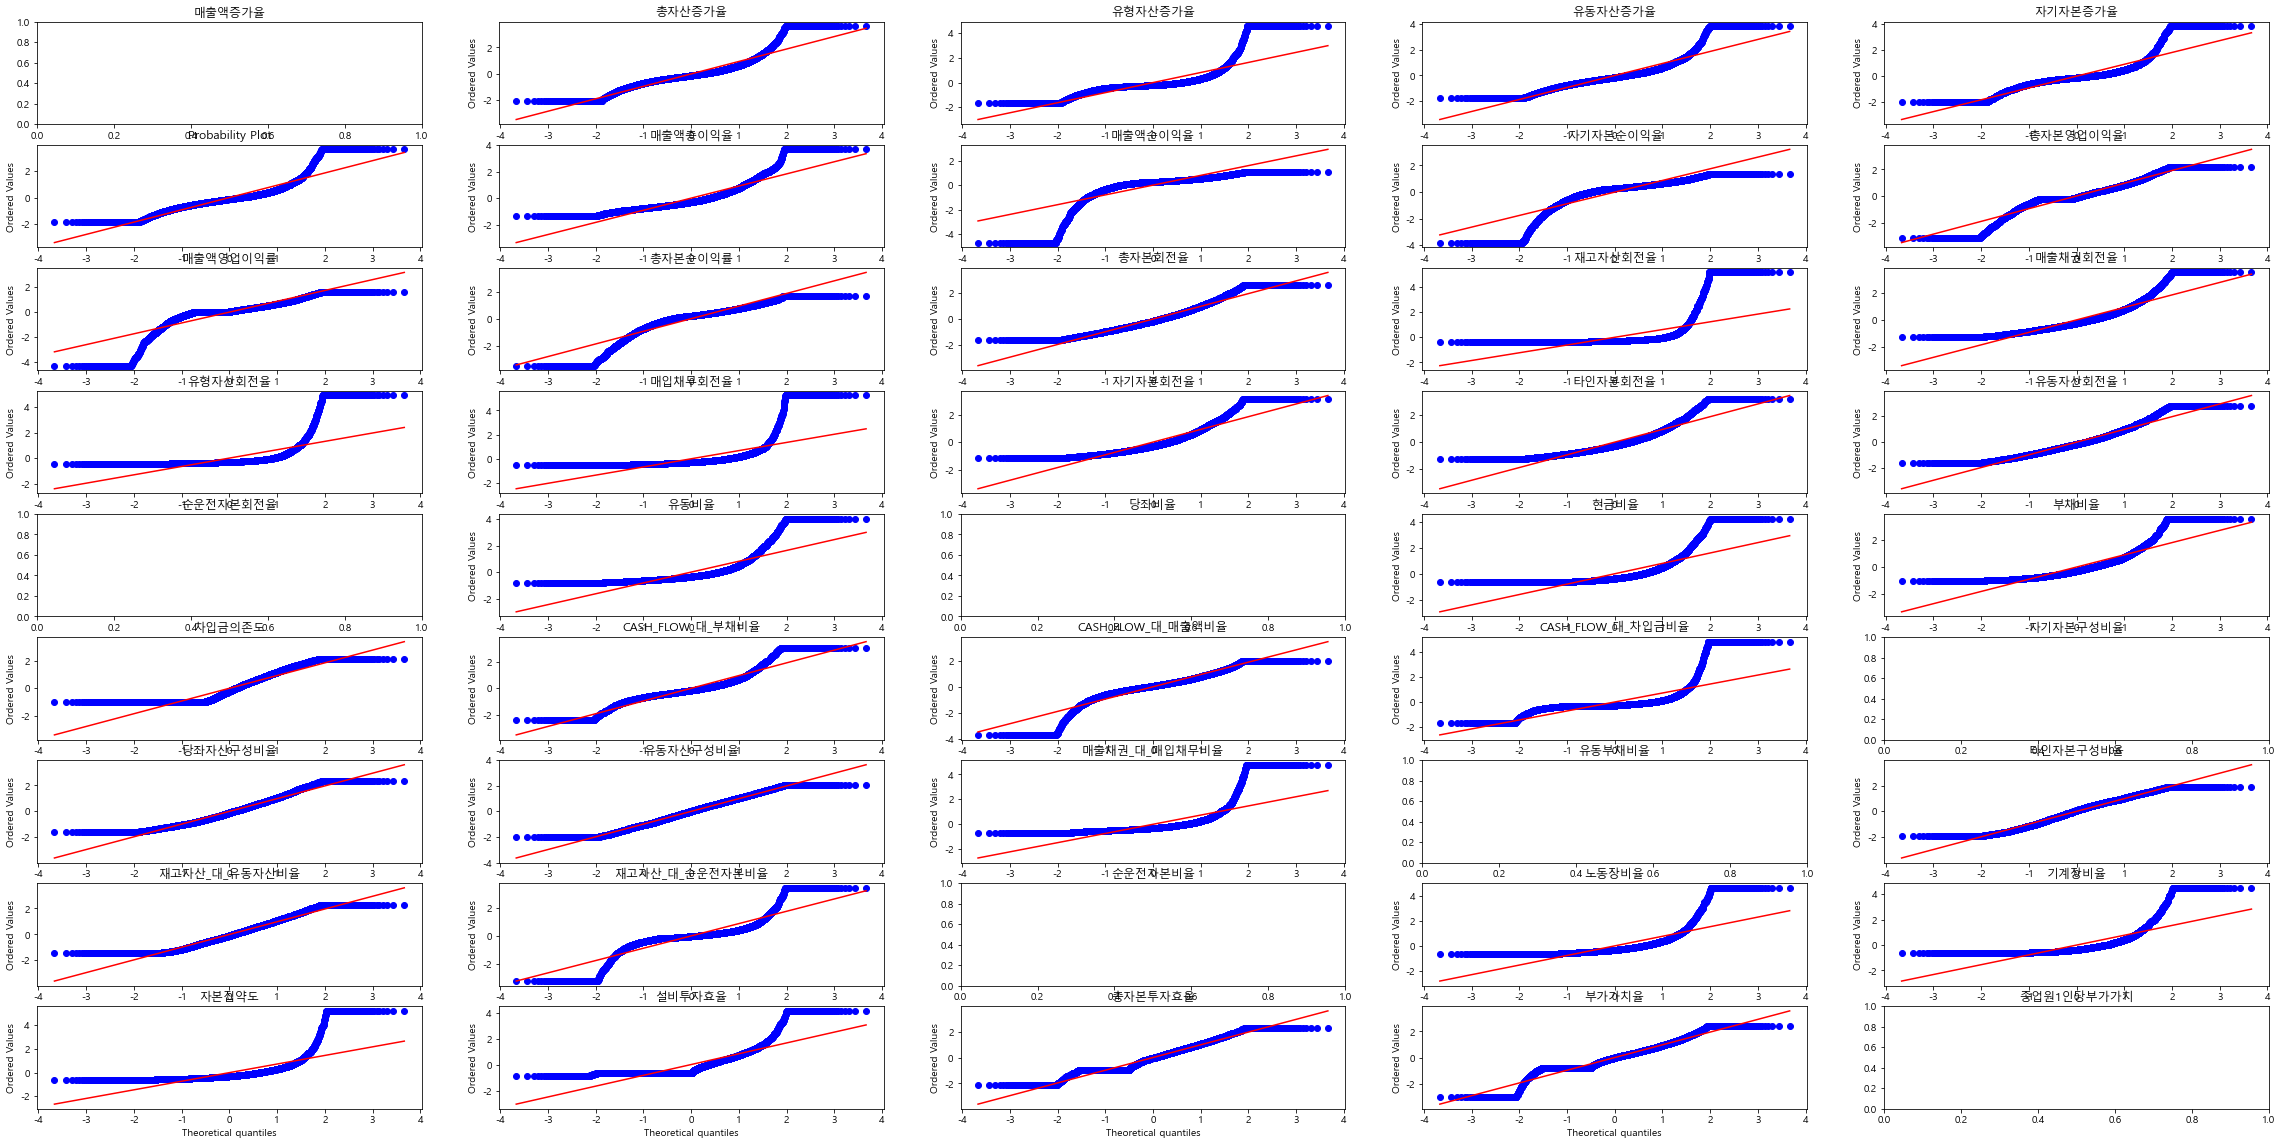

In [157]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread
import scipy.stats as stats

fig, axes = plt.subplots(9,5)
fig.set_size_inches((40,20))

#stats.probplot(ss_sc2['이자보상배율'],dist=stats.norm,plot=axes[0,0])
axes[0,0].title.set_text("이자보상배율")
stats.probplot(ss_sc2['총자산증가율'],dist=stats.norm,plot=axes[0,1])
axes[0,1].title.set_text("총자산증가율")
stats.probplot(ss_sc2['유형자산증가율'],dist=stats.norm,plot=axes[0,2])
axes[0,2].title.set_text("유형자산증가율")
stats.probplot(ss_sc2['유동자산증가율'],dist=stats.norm,plot=axes[0,3])
axes[0,3].title.set_text("유동자산증가율")
stats.probplot(ss_sc2['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
axes[0,4].title.set_text("자기자본증가율")
stats.probplot(ss_sc2['매출액증가율'],dist=stats.norm,plot=axes[1,0])
axes[0,0].title.set_text("매출액증가율")
stats.probplot(ss_sc2['매출액총이익율'],dist=stats.norm,plot=axes[1,1])
axes[1,1].title.set_text("매출액총이익율")
stats.probplot(ss_sc2['매출액순이익율'],dist=stats.norm,plot=axes[1,2])
axes[1,2].title.set_text("매출액순이익율")
stats.probplot(ss_sc2['자기자본순이익율'],dist=stats.norm,plot=axes[1,3])
axes[1,3].title.set_text("자기자본순이익율")
stats.probplot(ss_sc2['총자본영업이익율'],dist=stats.norm,plot=axes[1,4])
axes[1,4].title.set_text("총자본영업이익율")
stats.probplot(ss_sc2['매출액영업이익률'],dist=stats.norm,plot=axes[2,0])
axes[2,0].title.set_text("매출액영업이익률")
stats.probplot(ss_sc2['총자본순이익률'],dist=stats.norm,plot=axes[2,1])
axes[2,1].title.set_text("총자본순이익률")
stats.probplot(ss_sc2['총자본회전율'],dist=stats.norm,plot=axes[2,2])
axes[2,2].title.set_text("총자본회전율")
stats.probplot(ss_sc2['재고자산회전율'],dist=stats.norm,plot=axes[2,3])
axes[2,3].title.set_text("재고자산회전율")
stats.probplot(ss_sc2['매출채권회전율'],dist=stats.norm,plot=axes[2,4])
axes[2,4].title.set_text("매출채권회전율")
stats.probplot(ss_sc2['유형자산회전율'],dist=stats.norm,plot=axes[3,0])
axes[3,0].title.set_text("유형자산회전율")
stats.probplot(ss_sc2['매입채무회전율'],dist=stats.norm,plot=axes[3,1])
axes[3,1].title.set_text("매입채무회전율")
stats.probplot(ss_sc2['자기자본회전율'],dist=stats.norm,plot=axes[3,2])
axes[3,2].title.set_text("자기자본회전율")
stats.probplot(ss_sc2['타인자본회전율'],dist=stats.norm,plot=axes[3,3])
axes[3,3].title.set_text("타인자본회전율")
stats.probplot(ss_sc2['유동자산회전율'],dist=stats.norm,plot=axes[3,4])
axes[3,4].title.set_text("유동자산회전율")
#stats.probplot(ss_sc2['순운전자본회전율'],dist=stats.norm,plot=axes[4,0])
axes[4,0].title.set_text("순운전자본회전율")
stats.probplot(ss_sc2['유동비율'],dist=stats.norm,plot=axes[4,1])
axes[4,1].title.set_text("유동비율")
#stats.probplot(ss_sc2['당좌비율'],dist=stats.norm,plot=axes[4,2])
axes[4,2].title.set_text("당좌비율")
stats.probplot(ss_sc2['현금비율'],dist=stats.norm,plot=axes[4,3])
axes[4,3].title.set_text("현금비율")
stats.probplot(ss_sc2['부채비율'],dist=stats.norm,plot=axes[4,4])
axes[4,4].title.set_text("부채비율")
stats.probplot(ss_sc2['차입금의존도'],dist=stats.norm,plot=axes[5,0])
axes[5,0].title.set_text("차입금의존도")
stats.probplot(ss_sc2['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[5,1])
axes[5,1].title.set_text("CASH_FLOW_대_부채비율")
stats.probplot(ss_sc2['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,2])
axes[5,2].title.set_text("CASH_FLOW_대_매출액비율")
stats.probplot(ss_sc2['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,3])
axes[5,3].title.set_text("CASH_FLOW_대_차입금비율")
#stats.probplot(ss_sc2['자기자본구성비율'],dist=stats.norm,plot=axes[5,4])
axes[5,4].title.set_text("자기자본구성비율")
stats.probplot(ss_sc2['당좌자산구성비율'],dist=stats.norm,plot=axes[6,0])
axes[6,0].title.set_text("당좌자산구성비율")
stats.probplot(ss_sc2['유동자산구성비율'],dist=stats.norm,plot=axes[6,1])
axes[6,1].title.set_text("유동자산구성비율")
stats.probplot(ss_sc2['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,2])
axes[6,2].title.set_text("매출채권_대_매입채무비율")
#stats.probplot(ss_sc2['유동부채비율'],dist=stats.norm,plot=axes[6,3])
axes[6,3].title.set_text("유동부채비율")
stats.probplot(ss_sc2['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
axes[6,4].title.set_text("타인자본구성비율")
stats.probplot(ss_sc2['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,0])
axes[7,0].title.set_text("재고자산_대_유동자산비율")
stats.probplot(ss_sc2['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,1])
axes[7,1].title.set_text("재고자산_대_순운전자본비율")
#stats.probplot(ss_sc2['순운전자본비율'],dist=stats.norm,plot=axes[7,2])
axes[7,2].title.set_text("순운전자본비율")
stats.probplot(ss_sc2['노동장비율'],dist=stats.norm,plot=axes[7,3])
axes[7,3].title.set_text("노동장비율")
stats.probplot(ss_sc2['기계장비율'],dist=stats.norm,plot=axes[7,4])
axes[7,4].title.set_text("기계장비율")
stats.probplot(ss_sc2['자본집약도'],dist=stats.norm,plot=axes[8,0])
axes[8,0].title.set_text("자본집약도")
stats.probplot(ss_sc2['설비투자효율'],dist=stats.norm,plot=axes[8,1])
axes[8,1].title.set_text("설비투자효율")
stats.probplot(ss_sc2['총자본투자효율'],dist=stats.norm,plot=axes[8,2])
axes[8,2].title.set_text("총자본투자효율")
stats.probplot(ss_sc2['부가가치율'],dist=stats.norm,plot=axes[8,3])
axes[8,3].title.set_text("부가가치율")
#stats.probplot(ss_sc2['종업원1인당부가가치'],dist=stats.norm,plot=axes[8,4])
axes[8,4].title.set_text("종업원1인당부가가치")

plt.show()

In [158]:
# 둘 다 필요할 때
ss_all = pd.concat([ss_sc2, df_rate[5611:]])
ss_all = pd.concat([ss_all, df_encoding], axis=1)

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(ss_all,i)for i in range(ss_all.shape[1])]
vif['features'] = ss_all.columns


# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF_Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF_Factor,features
0,324.026897,유동자산구성비율
1,172.734037,당좌자산구성비율
2,129.125929,유동비율
3,123.962460,당좌비율
4,86.912391,타인자본구성비율
5,65.743322,유동부채비율
6,58.003765,부채비율
7,42.066081,순운전자본비율
8,20.835574,재고자산_대_유동자산비율
9,14.255096,총자본순이익률


In [160]:
# 필요한 라이브러리
import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
target = target_two
feature = ss_all

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
# feature_add = sm.add_constant(feature, has_constant='add')

# sm OLS 적합
model = sm.OLS(target, feature)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

# with open ('summary_with_const.csv', 'w') as fh:
#     fh.write(fitted_model.summary().as_csv())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  회생기업2   R-squared (uncentered):                   0.201
Model:                            OLS   Adj. R-squared (uncentered):              0.196
Method:                 Least Squares   F-statistic:                              44.53
Date:                Thu, 06 Oct 2022   Prob (F-statistic):                        0.00
Time:                        11:25:33   Log-Likelihood:                         -1663.0
No. Observations:                8748   AIC:                                      3424.
Df Residuals:                    8699   BIC:                                      3771.
Df Model:                          49                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
총자산증가율                0.0009      0.000      2.409      0.016       0.000       0.002
유형자산증가율           -8.862e-07      0.000     -0.007      0.994      -0.000       0.000
유동자산증가율              -0.0001      0.000     -0.535      0.593      -0.001       0.000
자기자본증가율              -0.0006      0.000     -2.745      0.006      -0.001      -0.000
매출액증가율               -0.0007      0.000     -3.710      0.000      -0.001      -0.000
매출액총이익율            3.367e-05      0.000      0.105      0.916      -0.001       0.001
매출액순이익율              -0.0006      0.001     -1.131      0.258      -0.002       0.000
자기자본순이익율             -0.0006      0.001     -0.897      0.370      -0.002       0.001
총자본영업이익율              0.0215      0.002      8.841      0.000       0.017       0.026
매출액영업이익률             -0.0046      0.001     -3.662      0.000      -0.007      -0.002
총자본순이익률               0.0039      0.002      2.125      0.034       0.000       0.007
총자본회전율               -0.0026      0.007     -0.384      0.701      -0.016       0.011
재고자산회전율            7.826e-05      0.000      0.744      0.457      -0.000       0.000
매출채권회전율              -0.0068      0.002     -3.975      0.000      -0.010      -0.003
유형자산회전율               0.0009      0.000      2.463      0.014       0.000       0.002
매입채무회전율               0.0005      0.000      2.263      0.024     7.2e-05       0.001
자기자본회전율               0.0035      0.005      0.692      0.489      -0.006       0.014
타인자본회전율               0.0142      0.004      3.554      0.000       0.006       0.022
유동자산회전율               0.0298      0.005      5.644      0.000       0.019       0.040
순운전자본회전율           6.278e-05      0.000      0.193      0.847      -0.001       0.001
유동비율              -9.294e-05      0.000     -0.477      0.633      -0.000       0.000
당좌비율                 -0.0001      0.000     -0.591      0.554      -0.001       0.000
현금비율              -2.363e-06      0.000     -0.018      0.986      -0.000       0.000
부채비율                 -0.0005      0.000     -1.928      0.054      -0.001    7.78e-06
차입금의존도             5.297e-05      0.001      0.105      0.917      -0.001       0.001
CASH_FLOW_대_부채비율      0.0012      0.000      2.674      0.007       0.000       0.002
CASH_FLOW_대_매출액비율    -0.0007      0.001     -0.826      0.409      -0.002       0.001
CASH_FLOW_대_차입금비율 -6.178e-06   5.61e-05     -0.110      0.912      -0.000       0.000
당좌자산구성비율             -0.0002      0.002     -0.103      0.918      -0.003       0.003
유동자산구성비율             -0.0013      0.002     -0.707      0.480      -0.005       0.002
매출채권_대_매입채무비율     -4.145e-05   1.63e-05     -2.545      0.011   -7.34e-05   -9.53e-06
유동부채비율                0.0004      0.000      1.178      0.23

In [204]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8748 entries, 0 to 8747
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   총자산증가율             8748 non-null   float64
 1   유형자산증가율            8748 non-null   float64
 2   유동자산증가율            8748 non-null   float64
 3   자기자본증가율            8748 non-null   float64
 4   매출액증가율             8748 non-null   float64
 5   매출액총이익율            8748 non-null   float64
 6   매출액순이익율            8748 non-null   float64
 7   자기자본순이익율           8748 non-null   float64
 8   총자본영업이익율           8748 non-null   float64
 9   매출액영업이익률           8748 non-null   float64
 10  총자본순이익률            8748 non-null   float64
 11  총자본회전율             8748 non-null   float64
 12  재고자산회전율            8748 non-null   float64
 13  매출채권회전율            8748 non-null   float64
 14  유형자산회전율            8748 non-null   float64
 15  매입채무회전율            8748 non-null   float64
 16  자기자본회전율            8748 

In [161]:
def backward_regression(feature, target,
                           initial_list=[], 
                           threshold_out = 0.05):

    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    import pandas as pd
    import warnings
    warnings.filterwarnings("ignore")

    feature_list = feature.columns.tolist()  
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adj_r_squared_list = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    included = feature.columns.tolist() 

    while True:
        changed=False
        model = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함
        worst_pval = pvalues.max()	# P 값이 가장 높은 것 선정
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(included.copy())

        if not changed:
            break

    # 최종모델 출력
    model = sm.OLS(target, sm.add_constant(feature[included])).fit()
    print(model.summary())
    print(feature[included].columns)

    
    # fig = plt.figure(figsize=(30,10))
    # plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=10)
    # plt.plot(steps, adj_r_squared_list, marker='o')
    # plt.ylabel('adj_r_squared',fontsize=15)
    # plt.grid(True)
    # plt.show()

    return model

backward_model = backward_regression(ss_all,target_two)

                            OLS Regression Results                            
Dep. Variable:                  회생기업2   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     61.76
Date:                Thu, 06 Oct 2022   Prob (F-statistic):          5.25e-211
Time:                        11:25:37   Log-Likelihood:                -1621.9
No. Observations:                8748   AIC:                             3282.
Df Residuals:                    8729   BIC:                             3416.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0845      0.004  

In [162]:
## LASSO
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
%matplotlib inline

lasso = Lasso(alpha = 100)
neg_mse_scores = cross_val_score(lasso, ss_all, target_two, scoring="neg_mean_squared_error", cv=TimeSeriesSplit(n_splits=6))
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.041 -0.107 -0.121 -0.136 -0.126 -0.13 ]
 5 folds 의 개별 RMSE scores :  [0.202 0.327 0.348 0.369 0.355 0.36 ]
 5 folds 의 평균 RMSE : 0.327 


In [163]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LogisticRegressionCV
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출

        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0,0.1,0.2,0.3,0.4,0.5]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=ss_all, y_target_n=target_two)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  Lasso #######
alpha 0일 때 5 폴드 세트의 평균 RMSE: 0.289 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.288 
alpha 0.2일 때 5 폴드 세트의 평균 RMSE: 0.290 
alpha 0.3일 때 5 폴드 세트의 평균 RMSE: 0.291 
alpha 0.4일 때 5 폴드 세트의 평균 RMSE: 0.292 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 0.292 


,alpha:0,alpha:0.1,alpha:0.2,alpha:0.3,alpha:0.4,alpha:0.5
매출원가감소율여부,9.458440e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
자본증가율여부,2.846344e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
유동자산회전율,2.754160e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
총자본영업이익율,2.164147e-02,3.325091e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
타인자본회전율,1.559372e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
투자활동감소율여부,8.182146e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
자기자본회전율,4.361139e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
총자본순이익률,4.253818e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
직원감소율여부,4.211805e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
순운전자본비율,3.528258e-03,2.366150e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [164]:
#df_choice = ss_all[['총자본영업이익율', '자기자본순이익율', '유동자산회전율', '타인자본회전율', '매출채권회전율', '재고자산_대_유동자산비율',
#'당좌자산구성비율', '차입금의존도', '순운전자본비율', '총자본투자효율']]

df_choice = ss_all[['기계장비율', '총자본영업이익율', '유형자산회전율', '자기자본순이익율', '유동자산회전율', '순운전자본비율', '타인자본회전율',
'재고자산_대_유동자산비율', '당좌자산구성비율', '유동자산증가율', '매출채권회전율', '유동비율', '매출원가감소율여부', '배당금감소율여부', '변화율여부',
       '직원감소율여부', '자본증가율여부', '투자활동감소율여부']]
df_choice = pd.concat([df_choice, x['회계년도'].astype(int)], axis=1)

In [165]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb

parameters = {
    'learning_rate' : [1, 0.1, 0.3, 0.5, 0.01],
    'max_depth' : [-1, 3, 5, 7, 10],
    'subsample' : [0.3, 0.5, 0.7, 1],
    'scale_pos_weight' : [1, 3, 5],
    'n_estimators' : [100, 150, 200, 300, 500, 1000]
}

model = xgb.XGBClassifier()
gs_model = GridSearchCV(model, parameters, scoring='f1', cv=TimeSeriesSplit(n_splits=6))

In [166]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{}, 정밀도:{}, 재현율:{}, f1:{}'.format(accuracy, precision, recall, f1))

In [167]:
X_train = df_choice[:5611]
y_train = target_two[:5611]
X_test = df_choice[5611:]
y_test = target_two[5611:]

# gs_model.fit(X_train, y_train)
# gs_model.best_params_

In [168]:
gs_model_two = xgb.XGBClassifier(max_depth=10, n_estimators=500, scale_pos_weight=2, learning_rate=0.5, subsample=0.3)
gs_model_two.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [169]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

pred = gs_model_two.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[2273,  366],
       [ 380,  118]], dtype=int64)

In [170]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2639
           1       0.24      0.24      0.24       498

    accuracy                           0.76      3137
   macro avg       0.55      0.55      0.55      3137
weighted avg       0.76      0.76      0.76      3137



In [171]:
get_clf_eval(y_test, pred)

Confusion Matrix
[[2273  366]
 [ 380  118]]
정확도:0.7621931781957284, 정밀도:0.24380165289256198, 재현율:0.23694779116465864, f1:0.24032586558044805


In [172]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred)

0.5491294469275358

In [173]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred)

0.5491294469275358

In [174]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=100)
#smote = SMOTE(random_state=100, sampling_strategy={0:y_train.value_counts().iloc[-1]/2, 1:y_train.value_counts().iloc[-1]})
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print("Before : ", X_train.shape, y_train.shape)
print("After : ", X_train_over.shape, y_train_over.shape)
y_train_over.value_counts()

Before :  (5611, 19) (5611,)
After :  (10344, 19) (10344,)


0    5172
1    5172
Name: 회생기업2, dtype: int64

In [175]:
gs_model_two.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [176]:
pred = gs_model_two.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[2518,  121],
       [ 438,   60]], dtype=int64)

In [177]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2639
           1       0.33      0.12      0.18       498

    accuracy                           0.82      3137
   macro avg       0.59      0.54      0.54      3137
weighted avg       0.77      0.82      0.79      3137



In [178]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred)

0.5373156133438642

In [179]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=100)
model_lr.fit(X_train_over, y_train_over)
pred_lr = model_lr.predict(X_test)

In [180]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_lr)

0.20688555945170545

In [181]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.06      0.11      2639
           1       0.17      0.99      0.28       498

    accuracy                           0.21      3137
   macro avg       0.57      0.53      0.20      3137
weighted avg       0.85      0.21      0.14      3137



In [182]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred_lr)

0.5261656706401201

In [183]:
model_lr_origin = LogisticRegression(random_state=100)
model_lr_origin.fit(X_train, y_train)
pred_lr_origin = model_lr_origin.predict(X_test)
accuracy_score(y_test, pred_lr_origin)

0.1976410583359898

In [184]:
print(classification_report(y_test, pred_lr_origin))

              precision    recall  f1-score   support

           0       0.98      0.05      0.09      2639
           1       0.16      1.00      0.28       498

    accuracy                           0.20      3137
   macro avg       0.57      0.52      0.19      3137
weighted avg       0.85      0.20      0.12      3137



In [185]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred_lr_origin)

0.5214857155031646

In [186]:
from imblearn.under_sampling import NearMiss

NM_Model = NearMiss(version = 2)

u_train_X, u_train_Y = NM_Model.fit_resample(X_train, y_train)
u_train_Y.value_counts()

0    439
1    439
Name: 회생기업2, dtype: int64

In [187]:
gs_model_two.fit(u_train_X, u_train_Y)
pred = gs_model_two.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[ 473, 2166],
       [  18,  480]], dtype=int64)

In [188]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.18      0.30      2639
           1       0.18      0.96      0.31       498

    accuracy                           0.30      3137
   macro avg       0.57      0.57      0.30      3137
weighted avg       0.84      0.30      0.30      3137



In [189]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred)

0.5715449901158252

In [190]:
model_lr_u = LogisticRegression(random_state=100)
model_lr_u.fit(u_train_X, u_train_Y)
pred_lr_u = model_lr_u.predict(X_test)
accuracy_score(y_test, pred_lr_u)

0.15875039846987568

In [191]:
print(classification_report(y_test, pred_lr_u))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2639
           1       0.16      1.00      0.27       498

    accuracy                           0.16      3137
   macro avg       0.08      0.50      0.14      3137
weighted avg       0.03      0.16      0.04      3137



In [192]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred_lr_u)

0.5

In [193]:
NM_Model_2 = NearMiss(version = 2, sampling_strategy={1:u_train_Y.value_counts().iloc[-1], 0:u_train_Y.value_counts().iloc[-1]*4})
u_train_X, u_train_Y = NM_Model_2.fit_resample(X_train, y_train)
u_train_Y.value_counts()

0    1756
1     439
Name: 회생기업2, dtype: int64

In [194]:
gs_model_two.fit(u_train_X, u_train_Y)
pred = gs_model_two.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[1535, 1104],
       [ 151,  347]], dtype=int64)

In [195]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.58      0.71      2639
           1       0.24      0.70      0.36       498

    accuracy                           0.60      3137
   macro avg       0.57      0.64      0.53      3137
weighted avg       0.80      0.60      0.65      3137



In [196]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred)

0.6392234340925658

In [197]:
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import ADASYN

X_samp, Y_samp = SMOTEENN(random_state=100).fit_resample(X_train, y_train)
Y_samp.value_counts()

1    5150
0    3887
Name: 회생기업2, dtype: int64

In [198]:
gs_model_two.fit(X_samp, Y_samp)
pred = gs_model_two.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[2594,   45],
       [ 494,    4]], dtype=int64)

In [199]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2639
           1       0.08      0.01      0.01       498

    accuracy                           0.83      3137
   macro avg       0.46      0.50      0.46      3137
weighted avg       0.72      0.83      0.76      3137



In [200]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred)

0.49549010745520927

In [201]:
model_lr_x = LogisticRegression(random_state=100)
model_lr_x.fit(X_samp, Y_samp)
pred_lr_x = model_lr_u.predict(X_test)
accuracy_score(y_test, pred_lr_x)

0.15875039846987568

In [202]:
print(classification_report(y_test, pred_lr_x))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2639
           1       0.16      1.00      0.27       498

    accuracy                           0.16      3137
   macro avg       0.08      0.50      0.14      3137
weighted avg       0.03      0.16      0.04      3137



In [203]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred_lr_x)

0.5